In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

###Information about Features and target variable

- age: age of the patient (years)
- anemia: decrease of red blood cells or hemoglobin (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- high blood pressure: if the patient has hypertension (boolean)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.describe().T

count      mean      std      min       25%  \
age                      299.00     60.83    11.89    40.00     51.00   
anaemia                  299.00      0.43     0.50     0.00      0.00   
creatinine_phosphokinase 299.00    581.84   970.29    23.00    116.50   
diabetes                 299.00      0.42     0.49     0.00      0.00   
ejection_fraction        299.00     38.08    11.83    14.00     30.00   
high_blood_pressure      299.00      0.35     0.48     0.00      0.00   
platelets                299.00 263358.03 97804.24 25100.00 212500.00   
serum_creatinine         299.00      1.39     1.03     0.50      0.90   
serum_sodium             299.00    136.63     4.41   113.00    134.00   
sex                      299.00      0.65     0.48     0.00      0.00   
smoking                  299.00      0.32     0.47     0.00      0.00   
time                     299.00    130.26    77.61     4.00     73.00   
DEATH_EVENT              299.00      0.32     0.47     0.00      0.00   

                               50%       75%       max  
age                          60.00     70.00     95.00  
anaemia                       0.00      1.00      1.00  
creatinine_phosphokinase    250.00    582.00   7861.00  
diabetes                      0.00      1.00      1.00  
ejection_fraction            38.00     45.00     80.00  
high_blood_pressure           0.00      1.00      1.00  
platelets                262000.00 303500.00 850000.00  
serum_creatinine              1.10      1.40      9.40  
serum_sodium                137.00    140.00    148.00  
sex                           1.00      1.00      1.00  
smoking                       0.00      1.00      1.00  
time                        115.00    203.00    285.00  
DEATH_EVENT                   0.00      1.00      1.00

<Axes: >

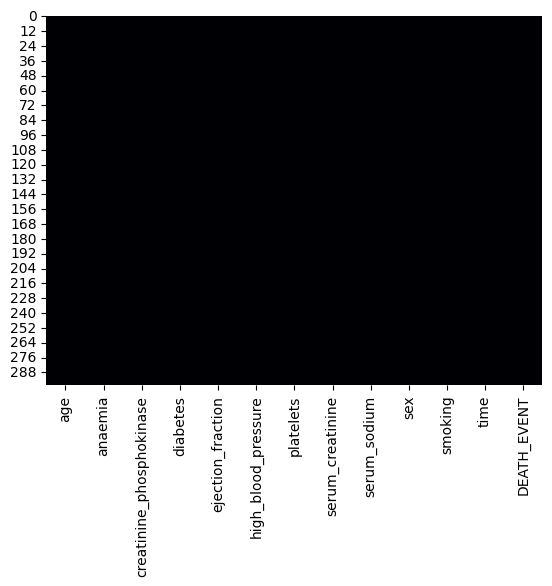

In [8]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

In [9]:
df['DEATH_EVENT'].unique()

array([1, 0])

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

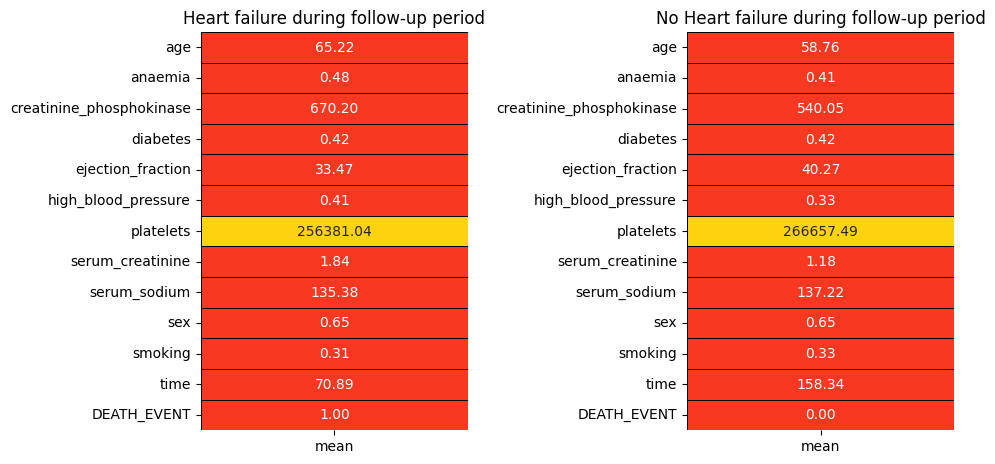

In [11]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart failure during follow-up period');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart failure during follow-up period');

fig.tight_layout(pad = 2)

###Dividing features into Numrical and Categorical 

In [12]:
columns = list(df.columns)
categorical_features = []
numerical_features = []
for i in columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Numerical Features : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [13]:
df.head(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   
5 90.00        1                        47         0                 40   
6 75.00        1                       246         0                 15   
7 60.00        1                       315         1                 60   
8 65.00        0                       157         0                 65   
9 80.00        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   
5                    1  204000.00              2.10           132    1   
6                    0  127000.00              1.20           137    1   
7                    0  454000.00              1.10           131    1   
8                    0  263358.03              1.50           138    0   
9                    1  388000.00              9.40           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

In [14]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

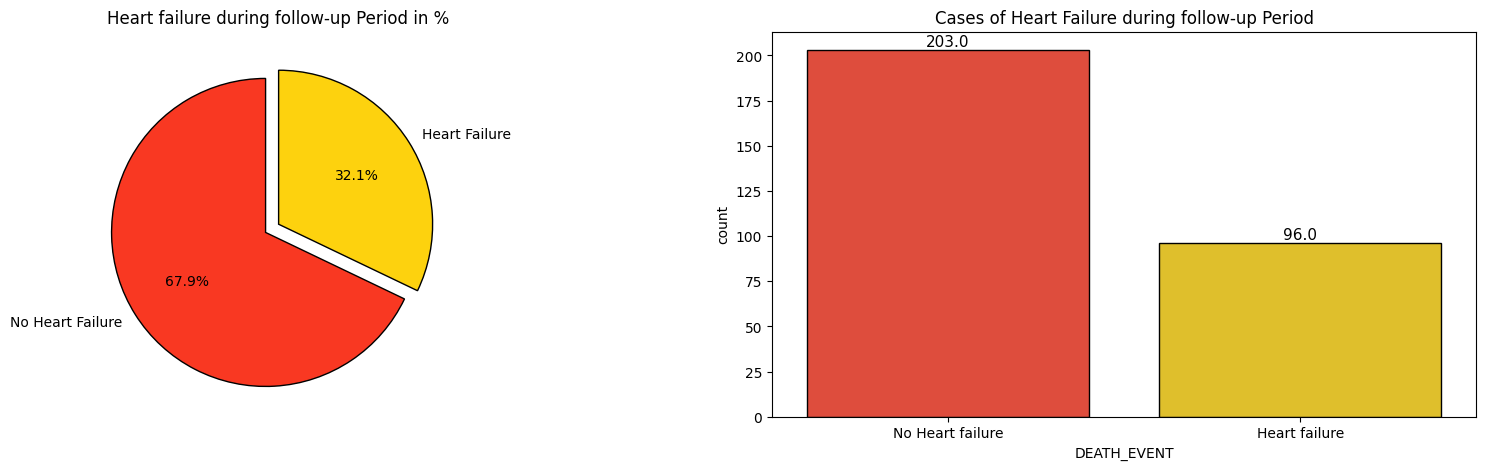

In [15]:
l = list(df['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Failure','Heart Failure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart failure during follow-up Period in %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'DEATH_EVENT',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart failure','Heart failure'])
plt.title('Cases of Heart Failure during follow-up Period');
plt.show()

In [16]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

Categorical Features vs Target Variable

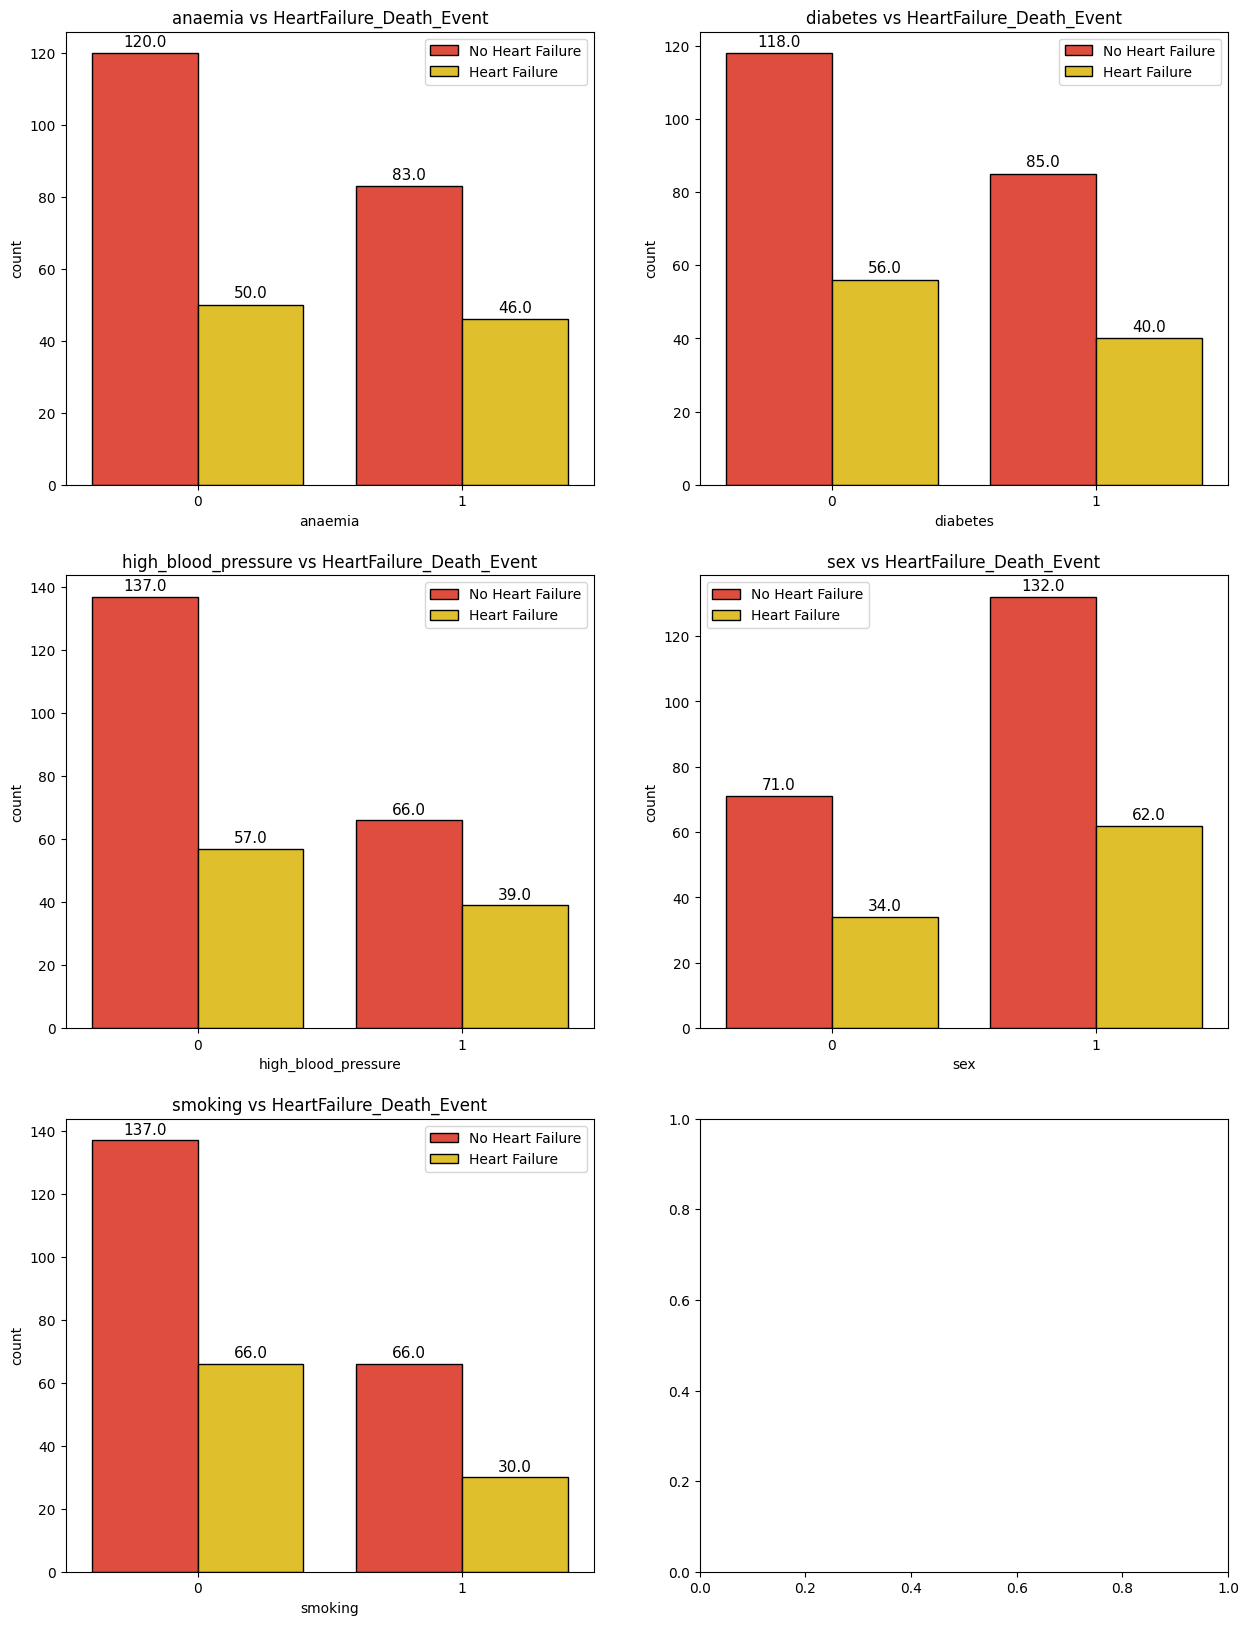

In [17]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,20))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x = categorical_features[i],data = df,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartFailure_Death_Event'
    plt.legend(['No Heart Failure','Heart Failure'])
    plt.title(title);

In [18]:
['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [19]:
df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()

0    50
1    46
Name: anaemia, dtype: int64

In [20]:
anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

db = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
db = [db[0] / sum(db) * 100,db[1] / sum(db) * 100]

hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smk = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
smk = [smk[0] / sum(smk) * 100,smk[1] / sum(smk) * 100]

# slope = df[df['DEATH_EVENT'] == 1]['ST_Slope'].value_counts()
# slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

In [21]:
df.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

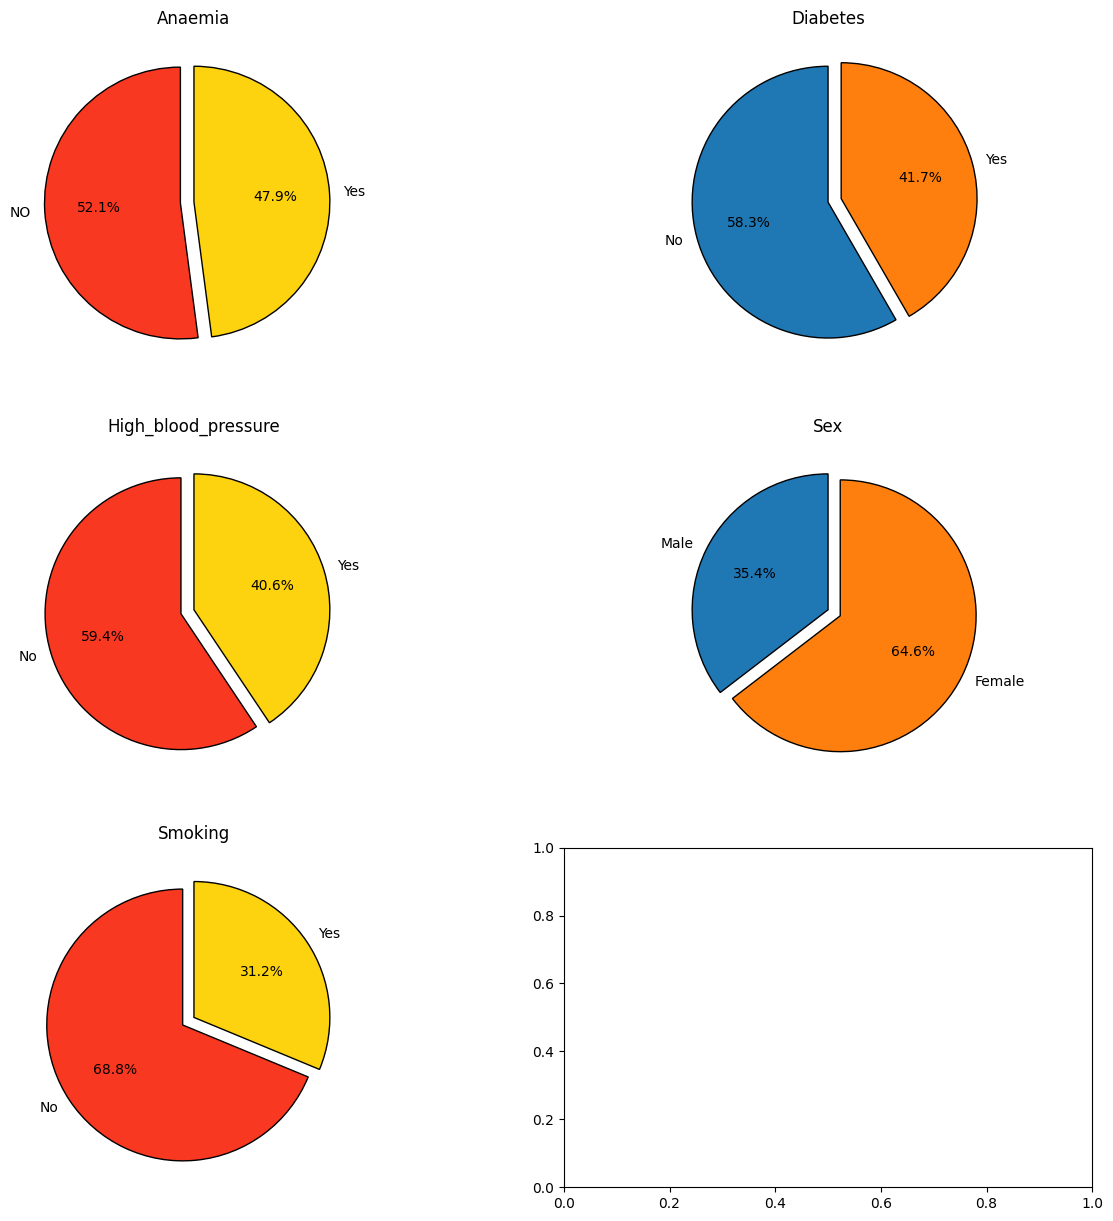

In [22]:
ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(x = anaemia,labels = ['NO','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(3,2,2)
plt.pie(x = db,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(3,2,3)
plt.pie(x = hbp,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High_blood_pressure');

plt.subplot(3,2,4)
plt.pie(x= sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,5)
plt.pie(x = smk,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

# plt.subplot(3,2,6)
# plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
#         wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
# plt.title('ST_Slope');

In [23]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [24]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

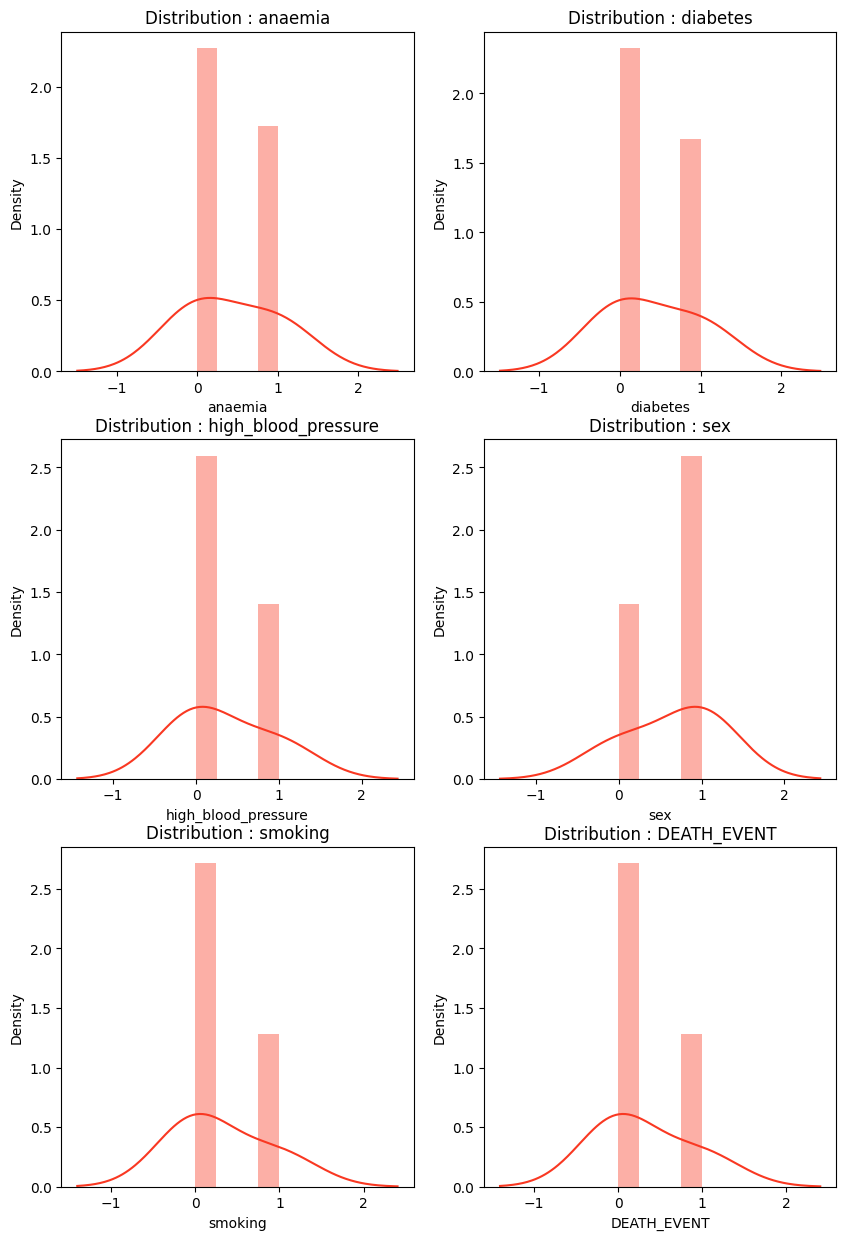

In [25]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
# plt.figure(figsize = (4.75,4.55))
# sns.distplot(df[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
# title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
# plt.title(title);

In [26]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

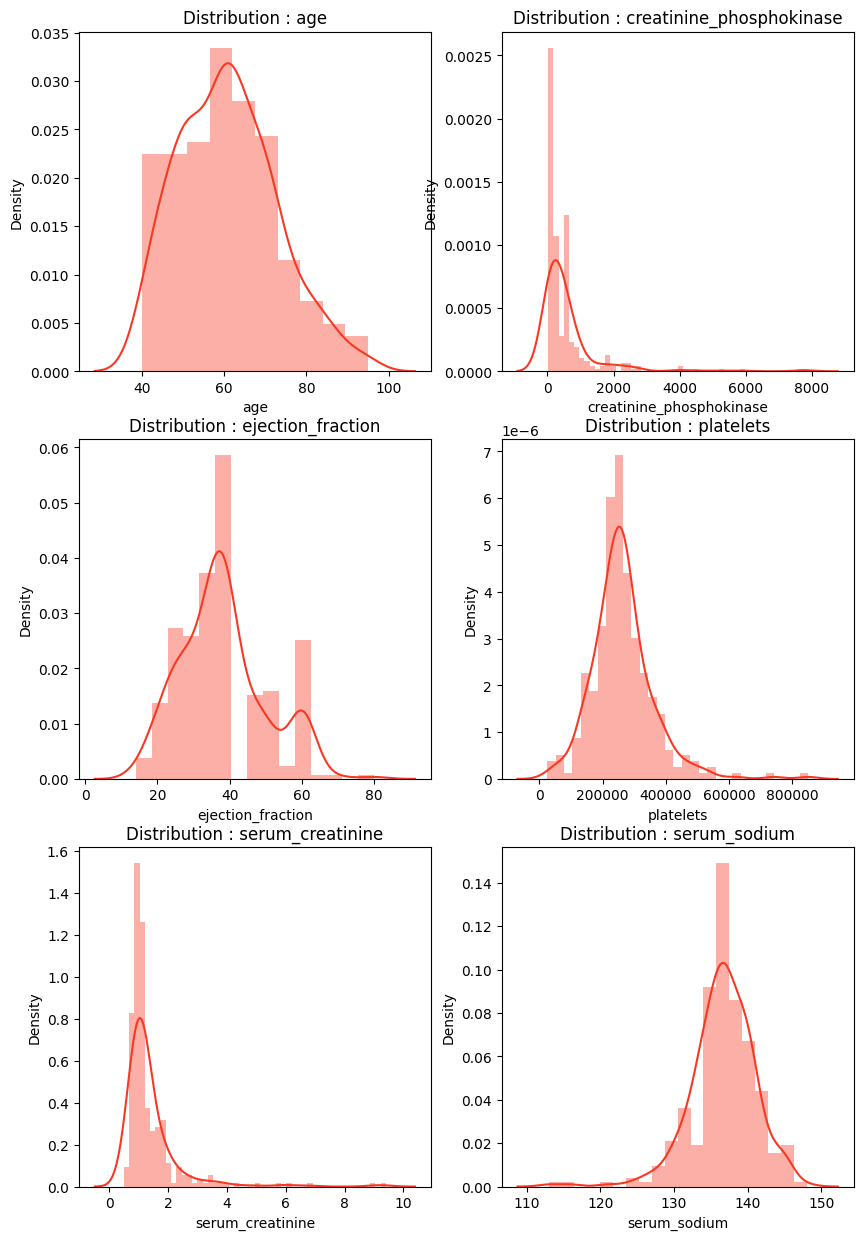

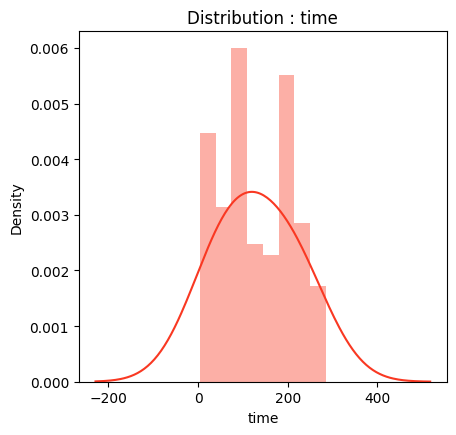

In [27]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

In [28]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

##Numrical Features VS Target Variable

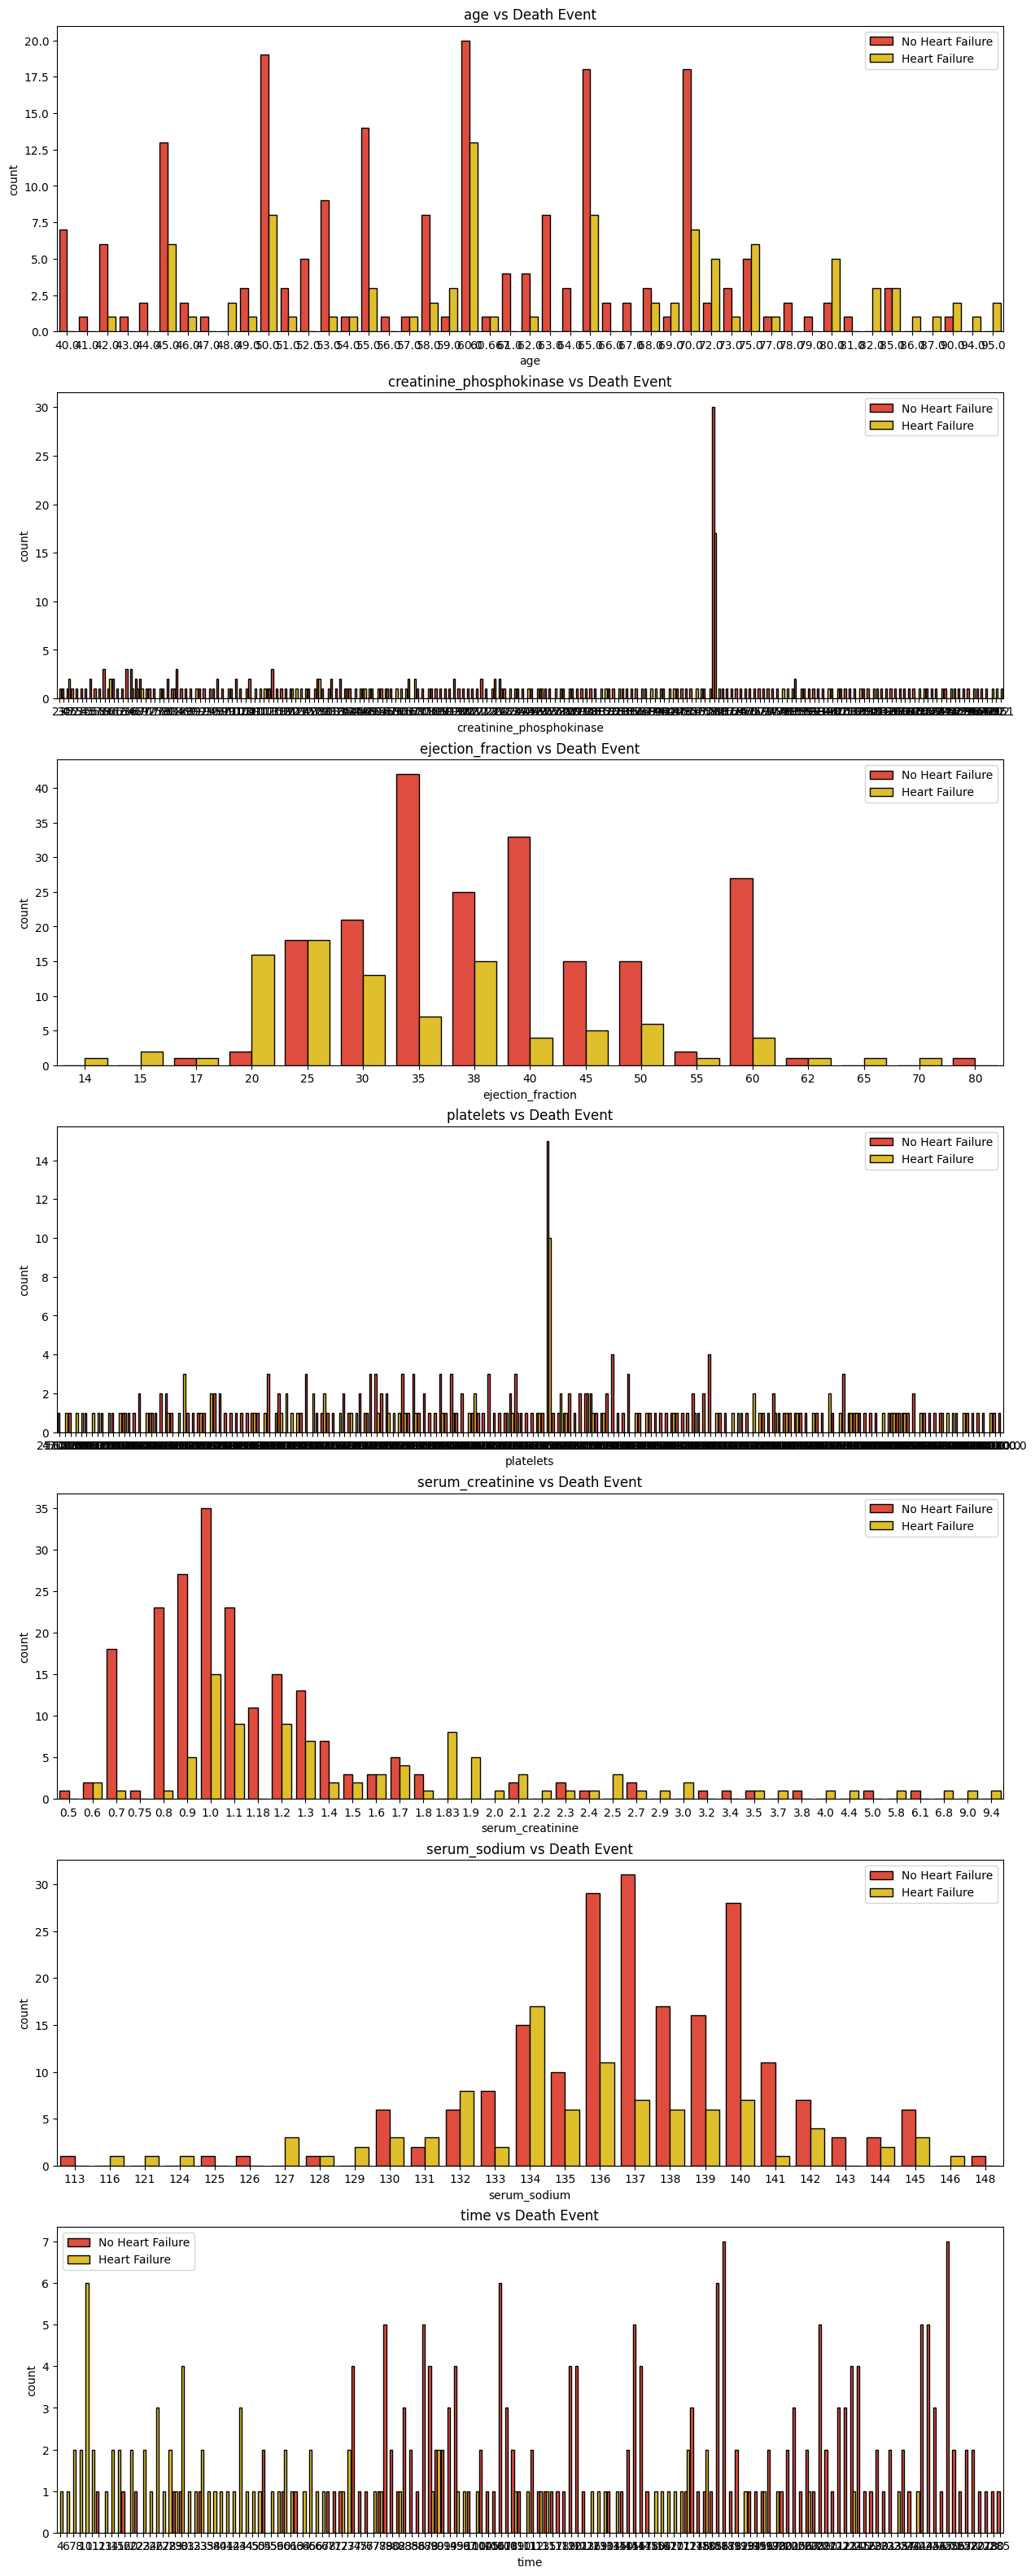

In [29]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,40))
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x=numerical_features[i],data = df,hue = "DEATH_EVENT",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Death Event'
    plt.legend(['No Heart Failure','Heart Failure'])
    plt.title(title);

In [30]:
df.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [31]:
df['platelets']

0     265000.00
1     263358.03
2     162000.00
3     210000.00
4     327000.00
         ...   
294   155000.00
295   270000.00
296   742000.00
297   140000.00
298   395000.00
Name: platelets, Length: 299, dtype: float64

In [32]:
df['age_Group'] = [ int(i / 5) for i in df['age']]
df['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in df['creatinine_phosphokinase']]
#df['platelets_Group'] = [ int((i*5) /1000) for i in df['platelets']]
df['time_Group'] = [ int( (i) / 10) for i in df['time']]

In [33]:
group_numerical_features = ['age_Group','creatinine_phosphokinase_Group','time_Group']

In [34]:
group_numerical_features

['age_Group', 'creatinine_phosphokinase_Group', 'time_Group']

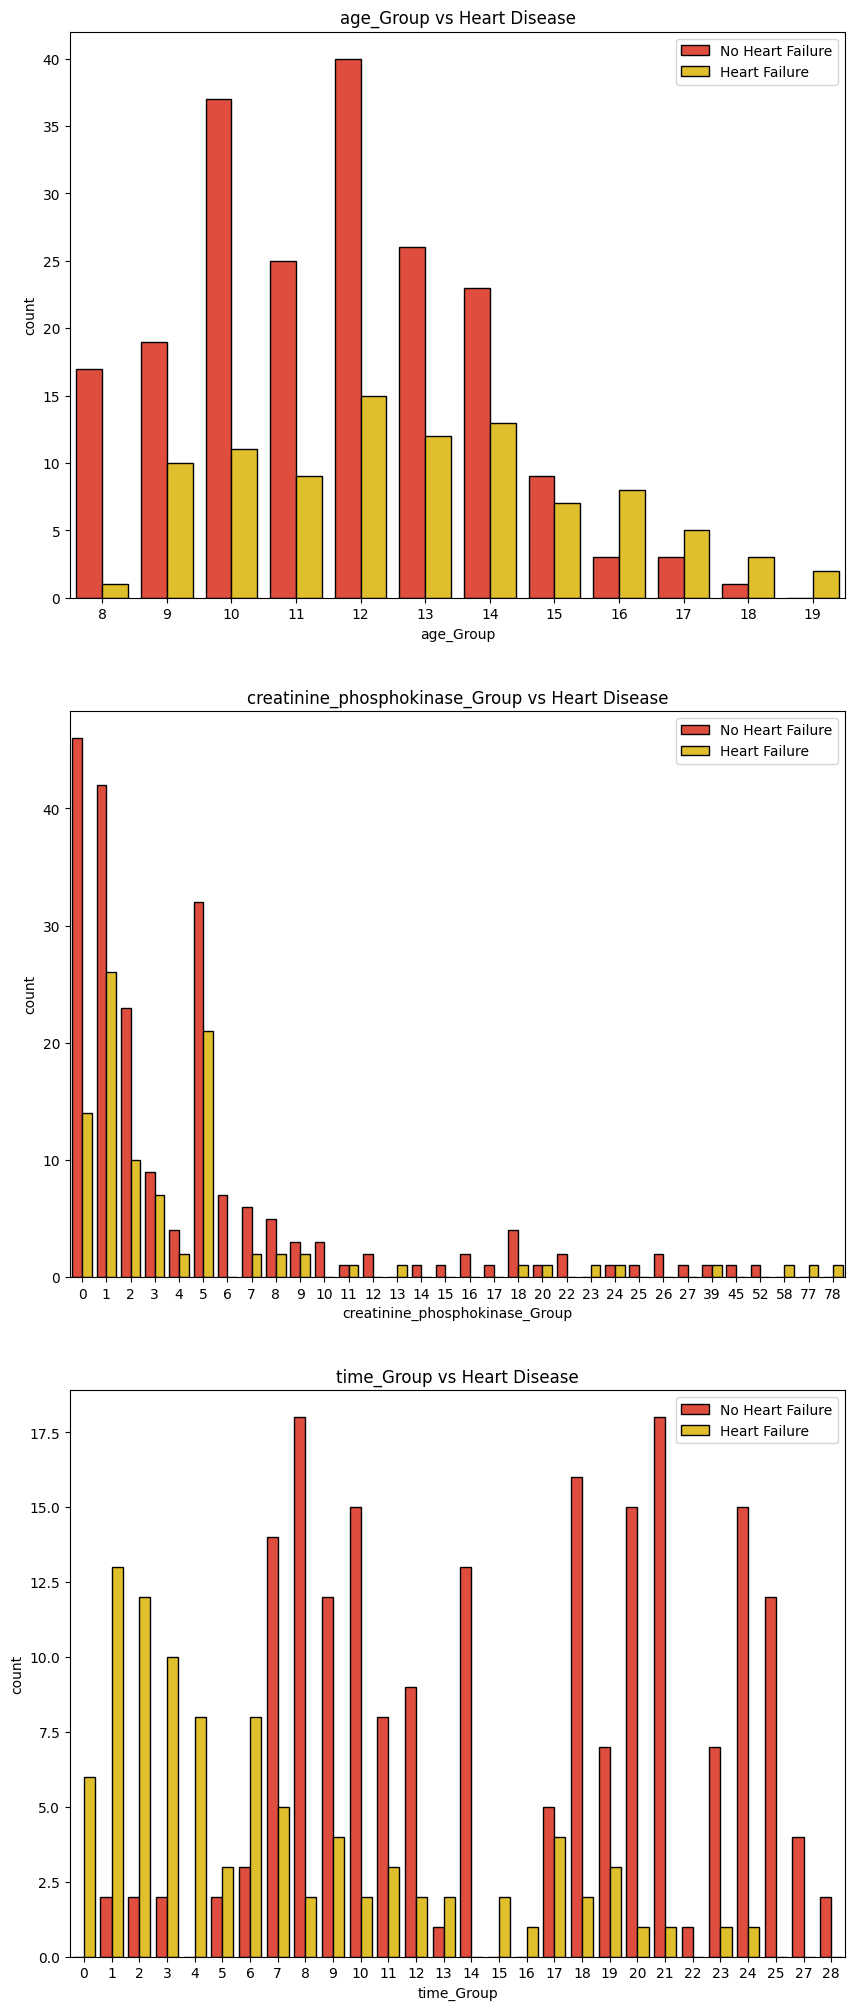

In [35]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (10,25))
for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = df,hue = "DEATH_EVENT",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Failure', 'Heart Failure'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             299 non-null    float64
 1   anaemia                         299 non-null    int64  
 2   creatinine_phosphokinase        299 non-null    int64  
 3   diabetes                        299 non-null    int64  
 4   ejection_fraction               299 non-null    int64  
 5   high_blood_pressure             299 non-null    int64  
 6   platelets                       299 non-null    float64
 7   serum_creatinine                299 non-null    float64
 8   serum_sodium                    299 non-null    int64  
 9   sex                             299 non-null    int64  
 10  smoking                         299 non-null    int64  
 11  time                            299 non-null    int64  
 12  DEATH_EVENT                     299 

In [37]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [38]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

## Sex Vs Numrical Feature

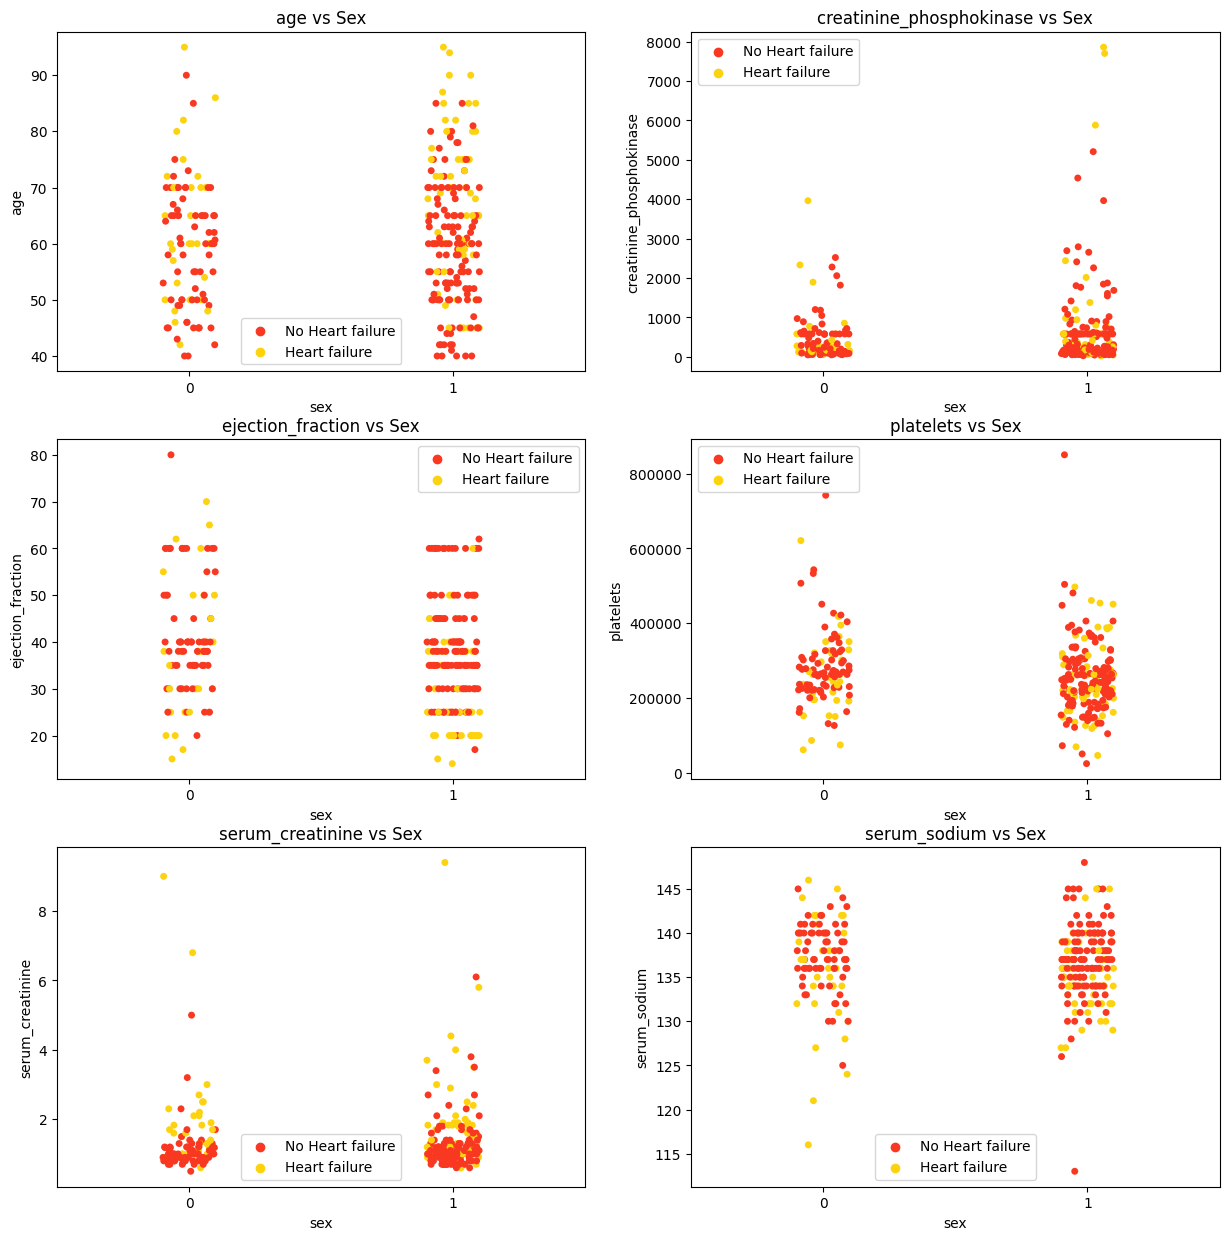

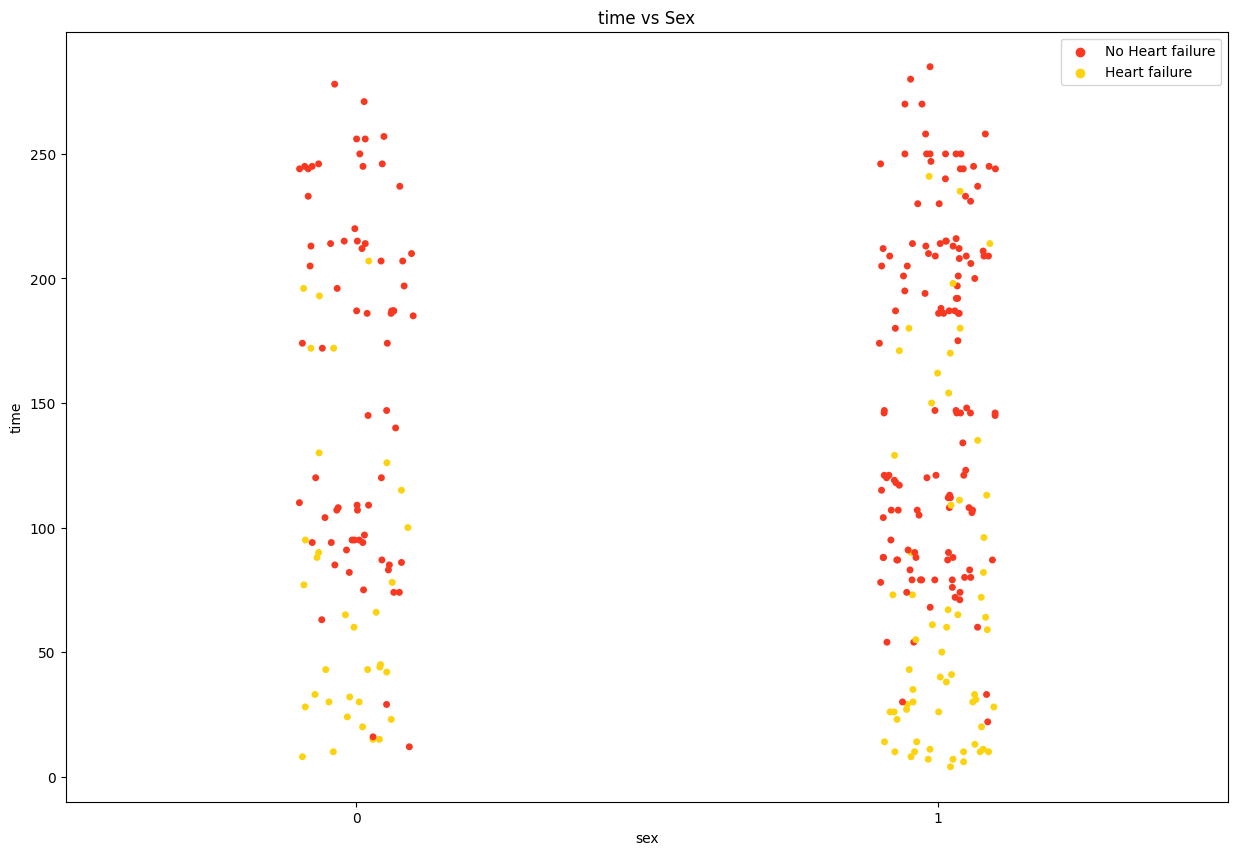

In [39]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.stripplot(x = 'sex',y = numerical_features[i],data = df,hue = 'DEATH_EVENT',palette = colors);
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax[i//2][i%2].get_legend_handles_labels()

    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax[i//2][i%2].legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for i in [-1]:
    plt.subplot(1, 1, -i)
    sns.stripplot(x='sex', y=numerical_features[i], data=df, hue='DEATH_EVENT', palette=colors)
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax.get_legend_handles_labels()
    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax.legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

## Anaemia Vs Numrical Feature

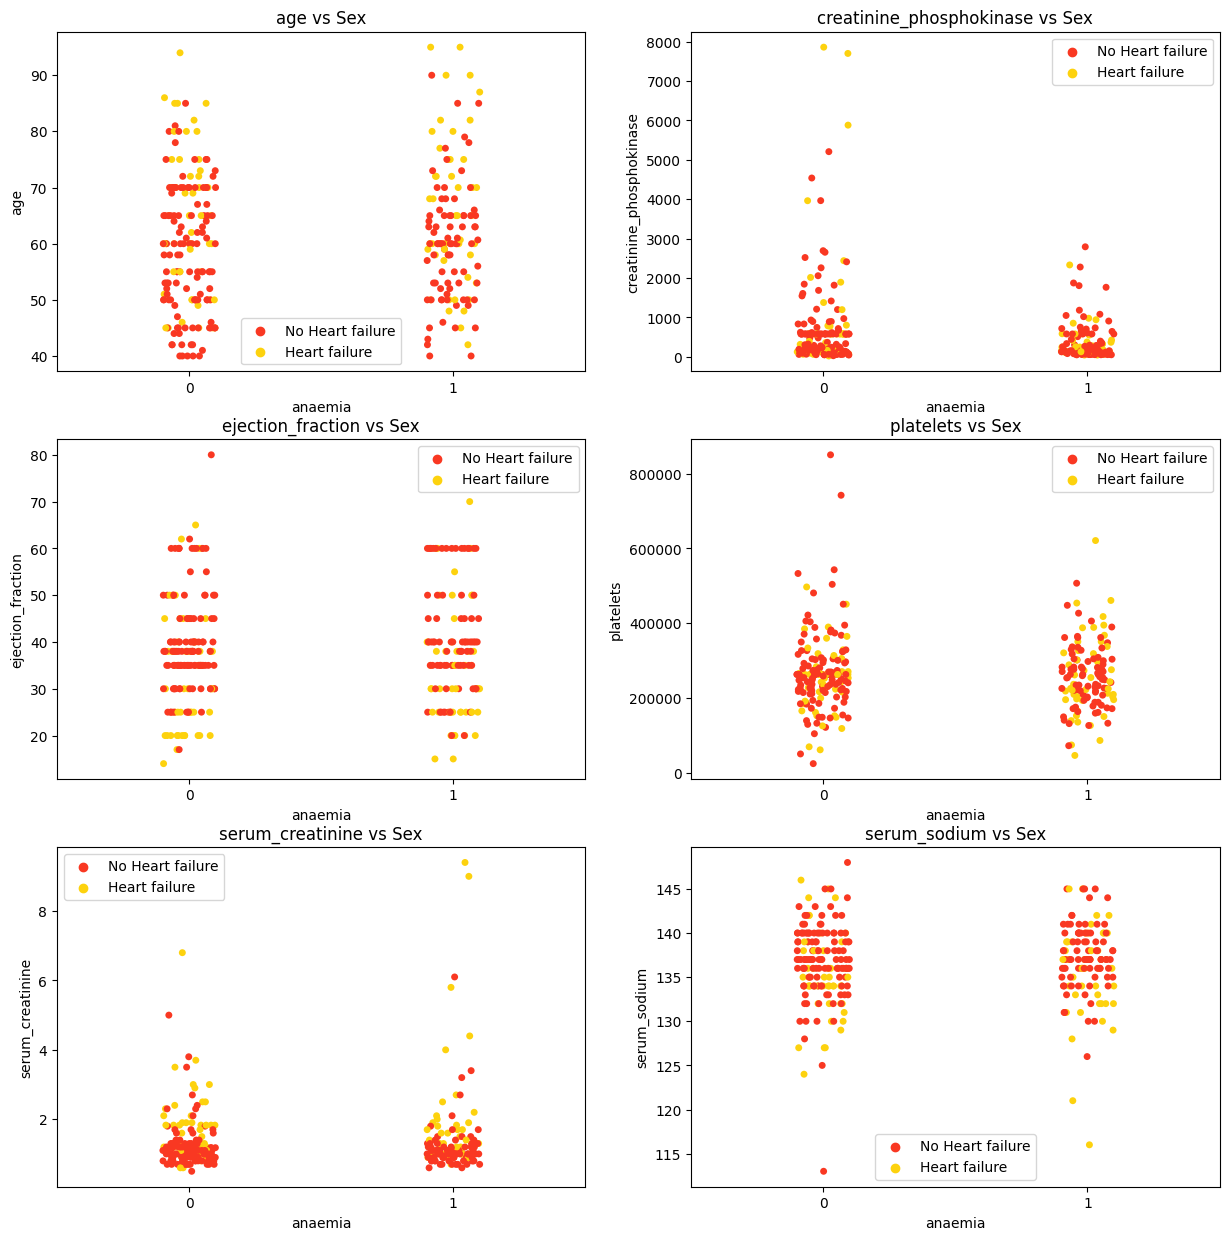

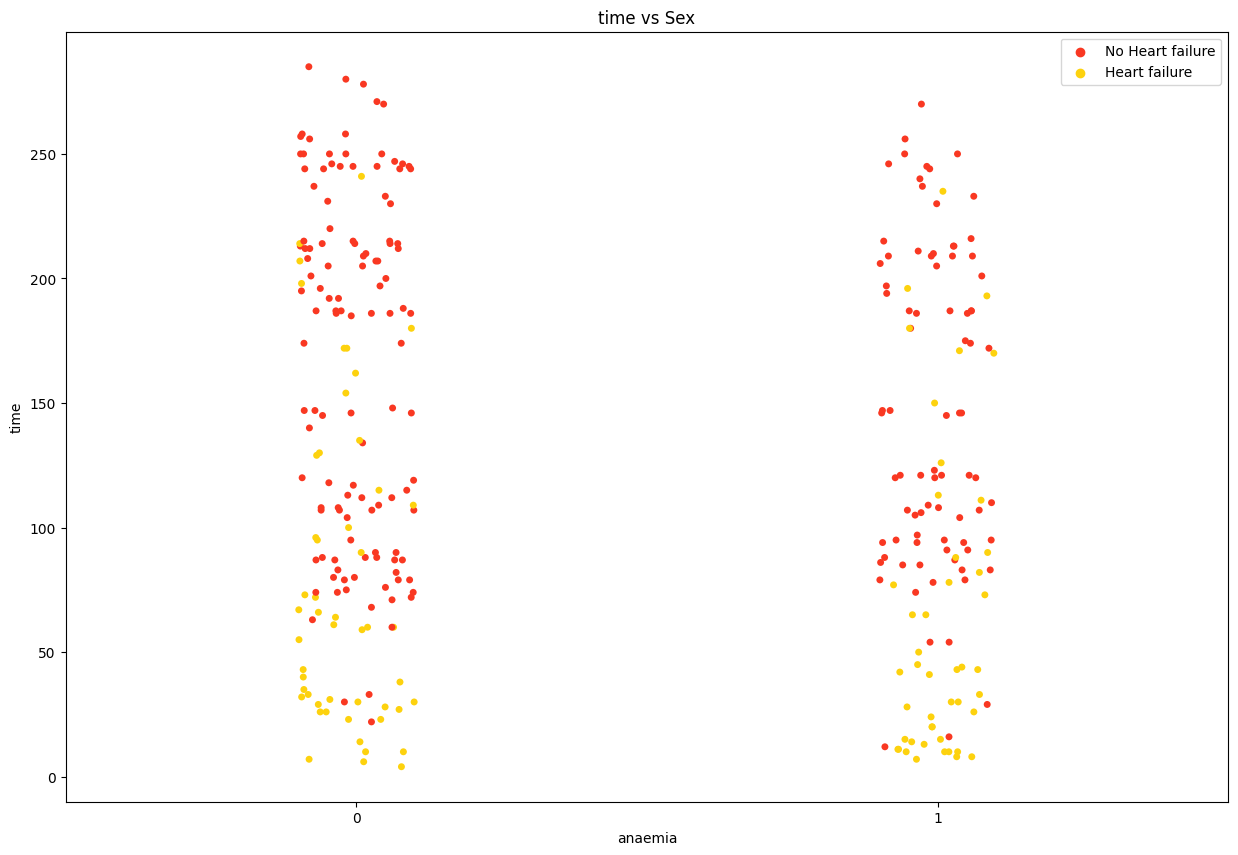

In [40]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.stripplot(x = 'anaemia',y = numerical_features[i],data = df,hue = 'DEATH_EVENT',palette = colors);
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax[i//2][i%2].get_legend_handles_labels()

    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax[i//2][i%2].legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for i in [-1]:
    plt.subplot(1, 1, -i)
    sns.stripplot(x='anaemia', y=numerical_features[i], data=df, hue='DEATH_EVENT', palette=colors)
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax.get_legend_handles_labels()
    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax.legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

## Diabetes Vs Numrical Feature

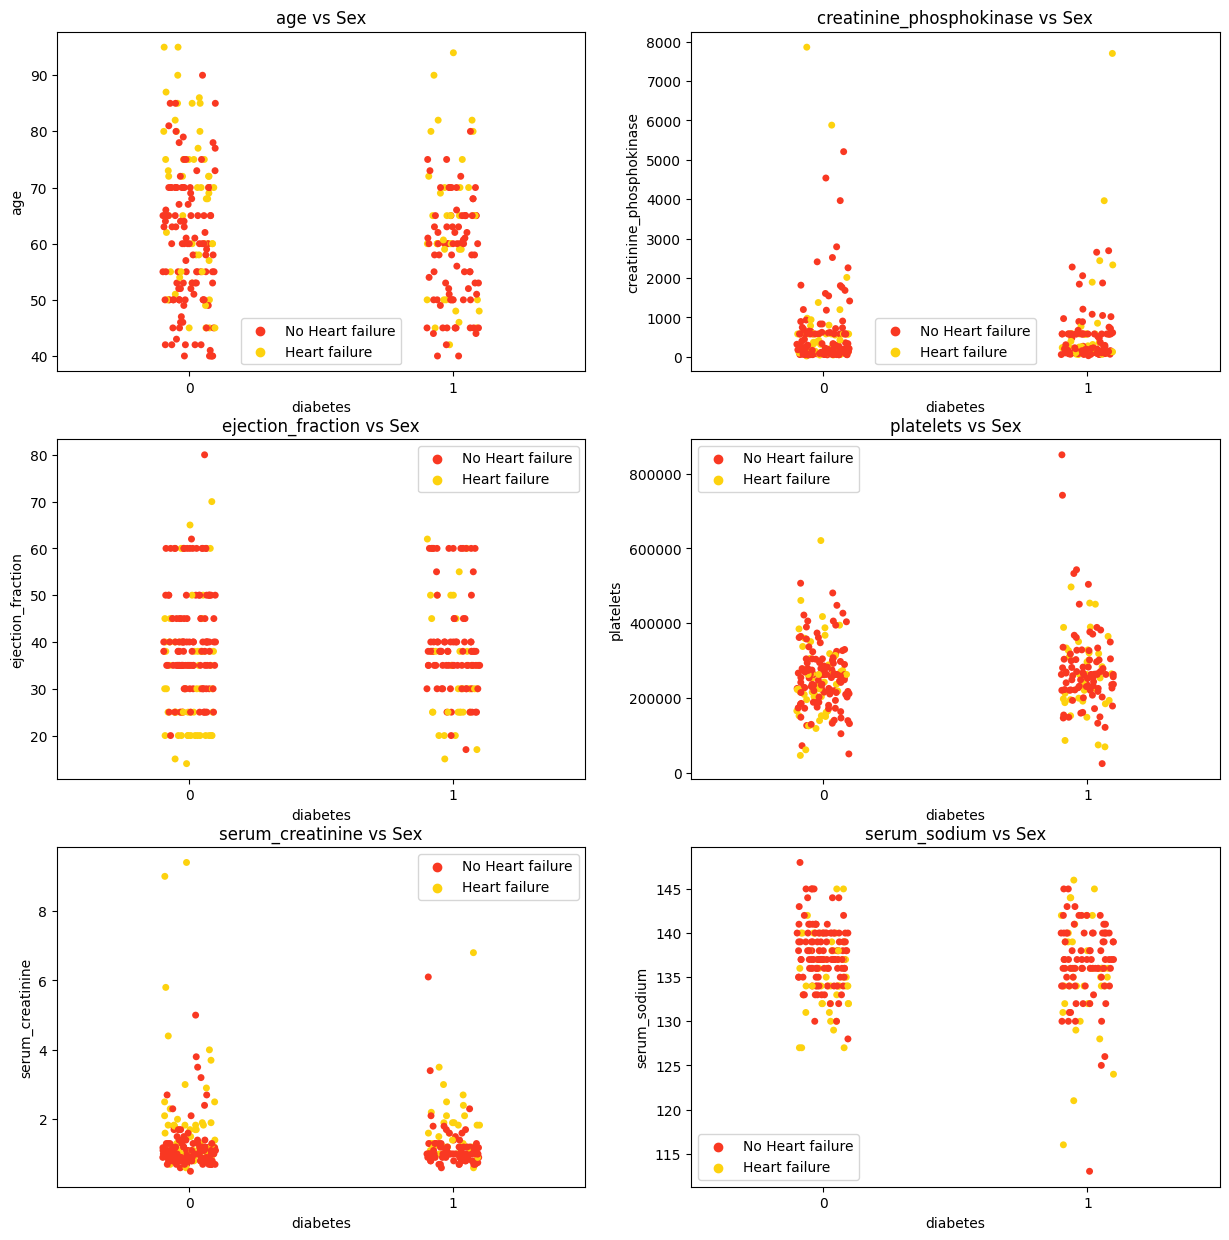

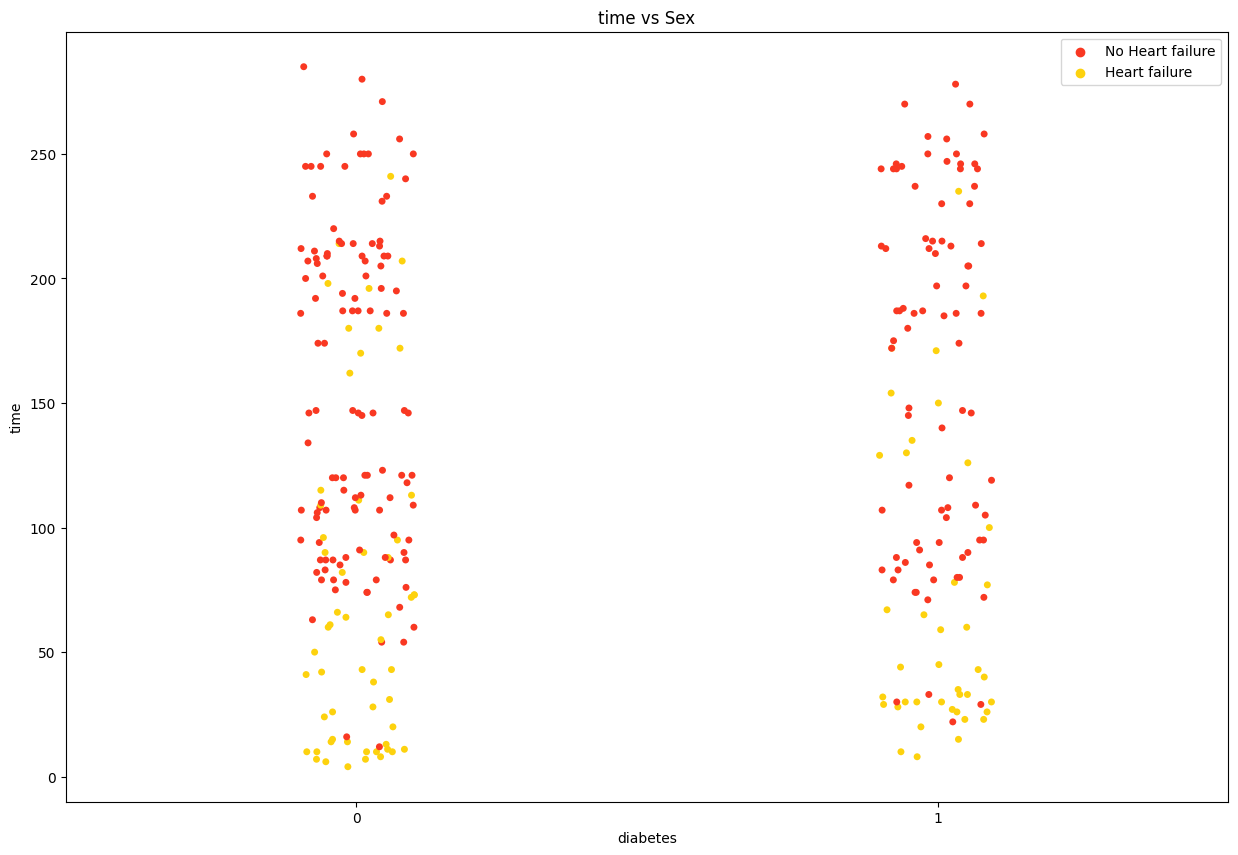

In [41]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.stripplot(x = 'diabetes',y = numerical_features[i],data = df,hue = 'DEATH_EVENT',palette = colors);
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax[i//2][i%2].get_legend_handles_labels()

    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax[i//2][i%2].legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for i in [-1]:
    plt.subplot(1, 1, -i)
    sns.stripplot(x='diabetes', y=numerical_features[i], data=df, hue='DEATH_EVENT', palette=colors)
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax.get_legend_handles_labels()
    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax.legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

###High_blood_pressure VS Numrical Feature

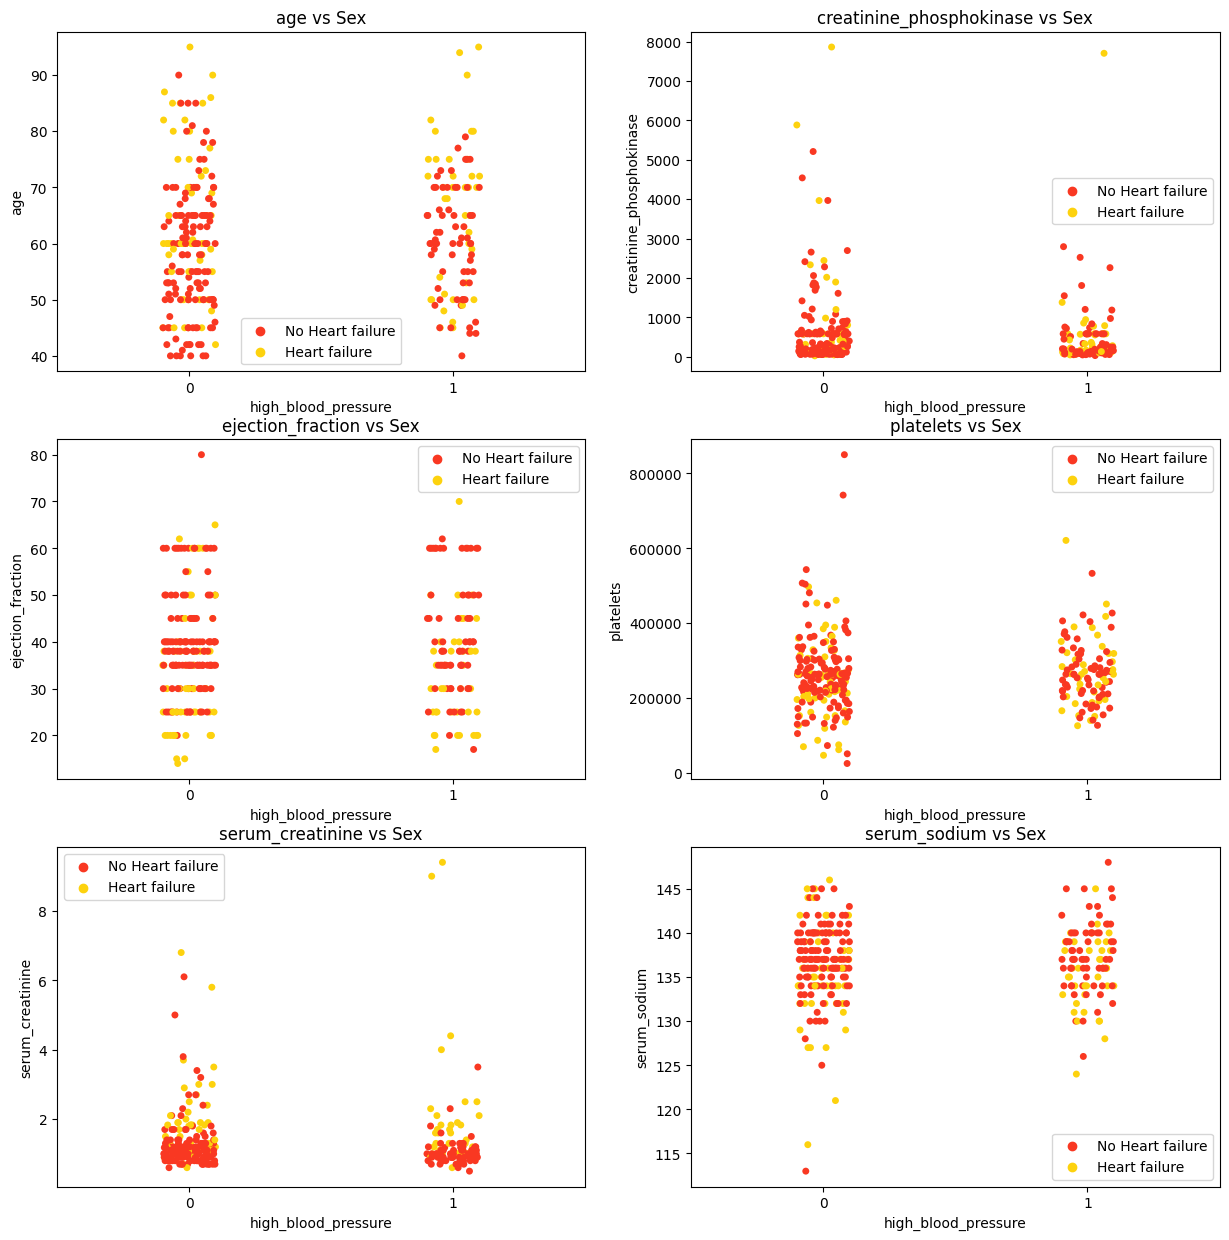

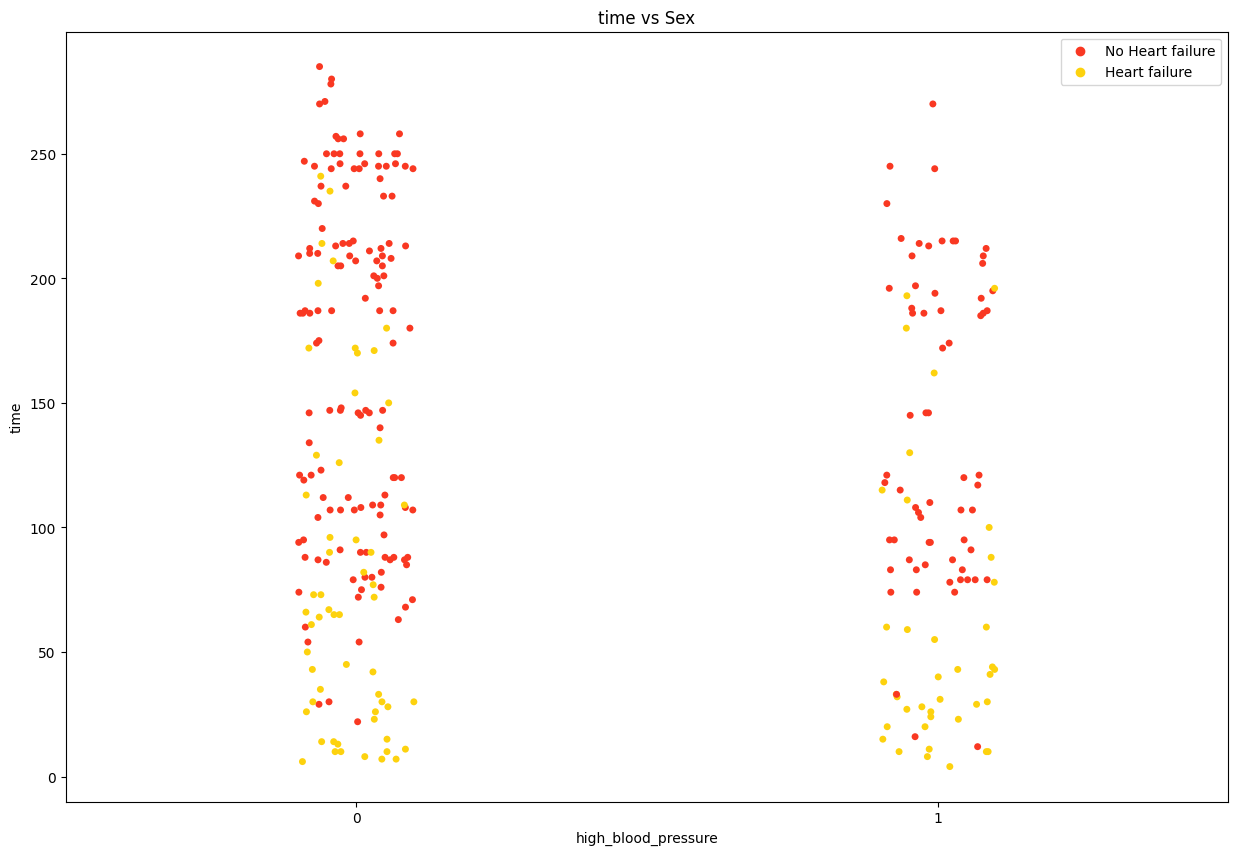

In [42]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.stripplot(x = 'high_blood_pressure',y = numerical_features[i],data = df,hue = 'DEATH_EVENT',palette = colors);
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax[i//2][i%2].get_legend_handles_labels()

    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax[i//2][i%2].legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for i in [-1]:
    plt.subplot(1, 1, -i)
    sns.stripplot(x='high_blood_pressure', y=numerical_features[i], data=df, hue='DEATH_EVENT', palette=colors)
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax.get_legend_handles_labels()
    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax.legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

In [43]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

###Smoking Vs Numrical Feature

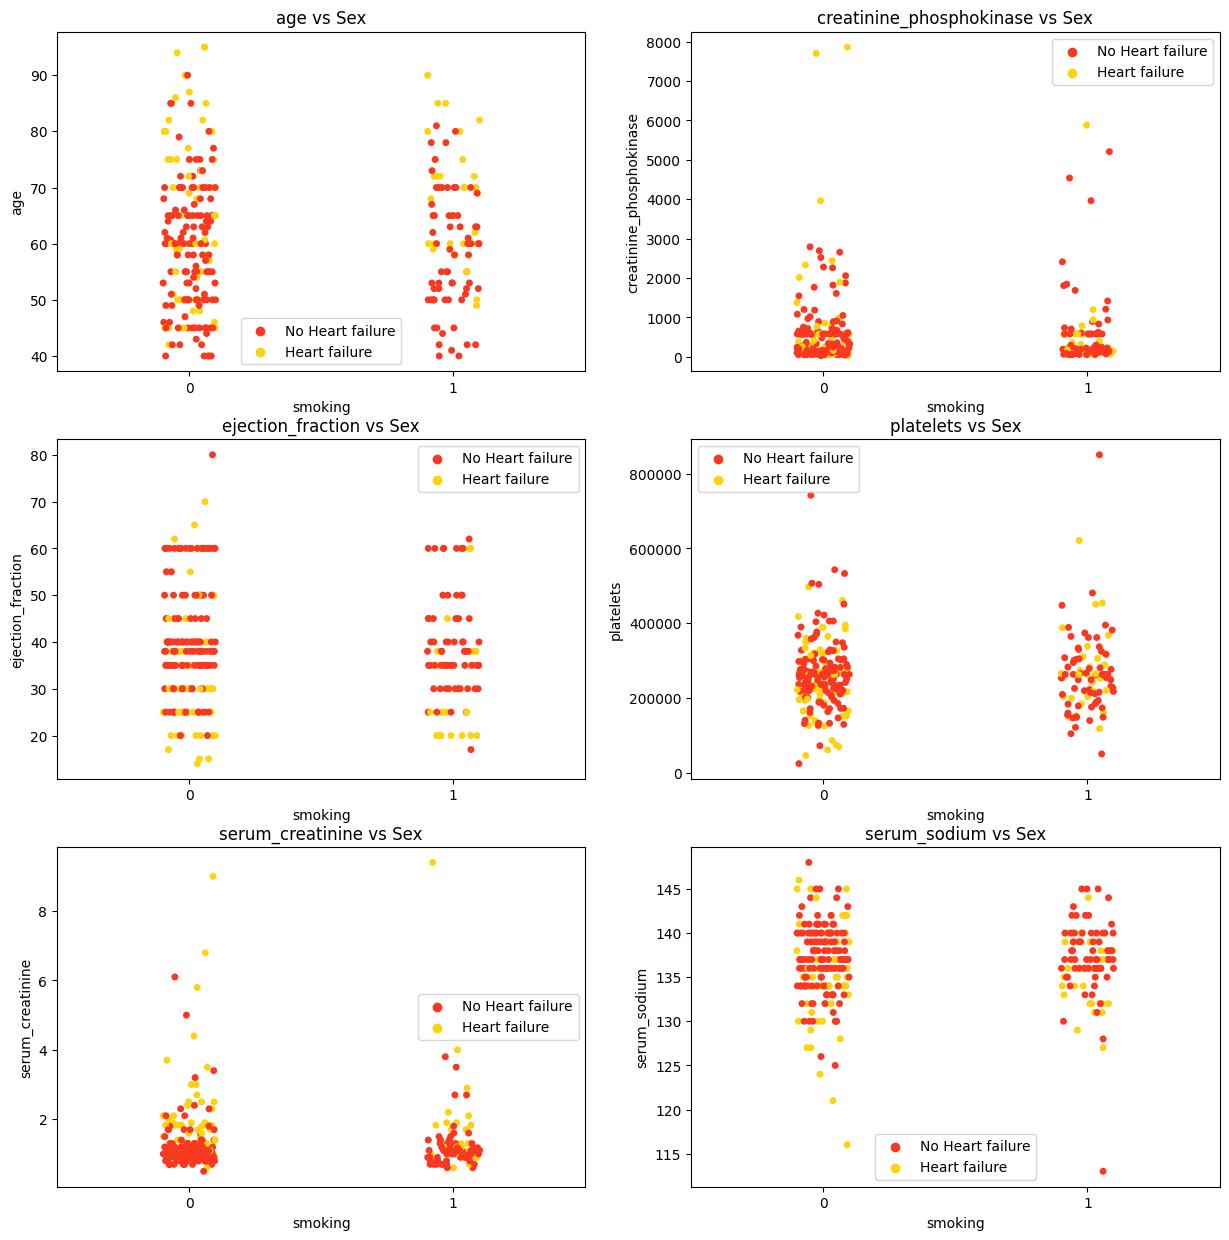

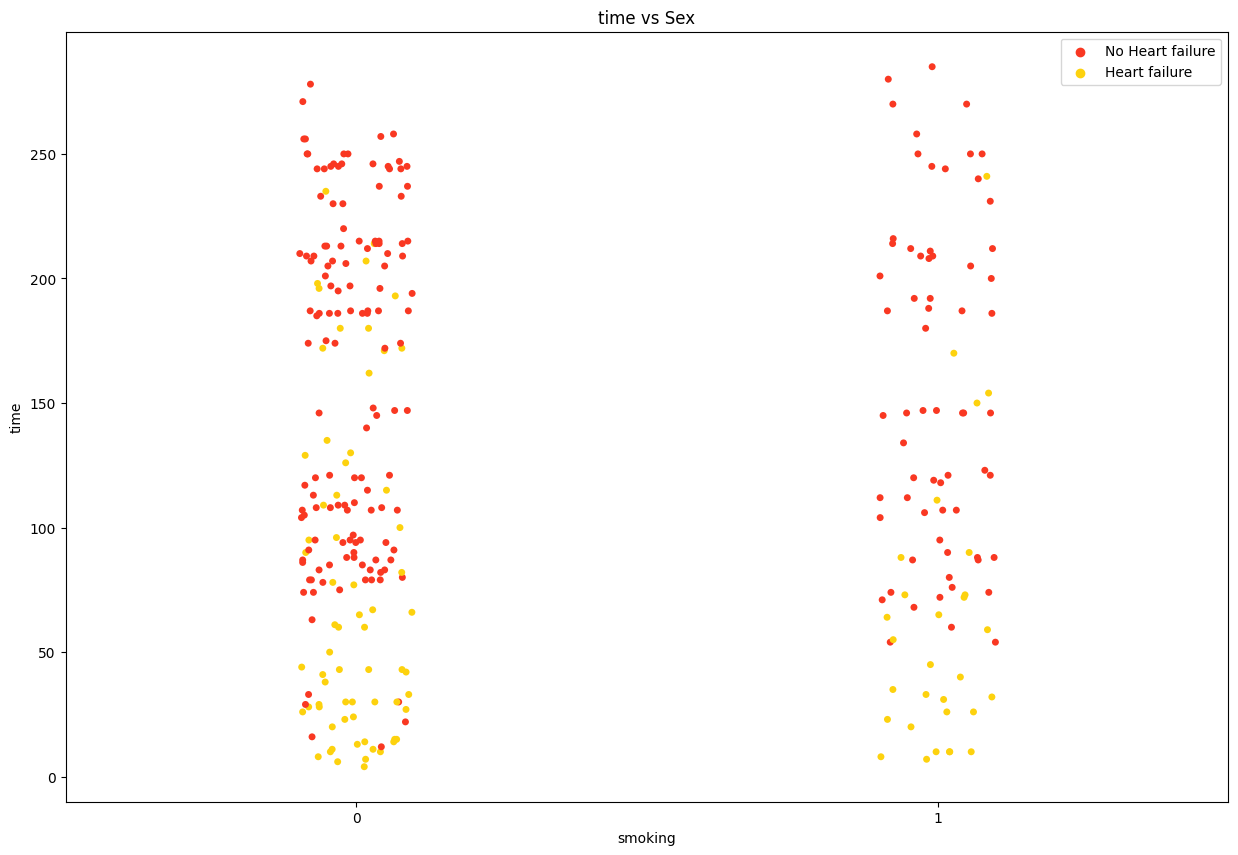

In [44]:
fig,ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.stripplot(x = 'smoking',y = numerical_features[i],data = df,hue = 'DEATH_EVENT',palette = colors);
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax[i//2][i%2].get_legend_handles_labels()

    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax[i//2][i%2].legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

for i in [-1]:
    plt.subplot(1, 1, -i)
    sns.stripplot(x='smoking', y=numerical_features[i], data=df, hue='DEATH_EVENT', palette=colors)
    plt.legend(['No Heart failure', 'Heart failure'])
    # Get the handles and labels of the legend
    handles, labels = ax.get_legend_handles_labels()
    # Define a dictionary to map the legend labels
    legend_labels = {'0': 'No Heart failure', '1': 'Heart failure'}
    # Update the legend labels using the dictionary
    new_labels = [legend_labels[label] for label in labels]
    # Update the legend with the new labels
    ax.legend(handles, new_labels)
    # Set the title
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

In [45]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [46]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

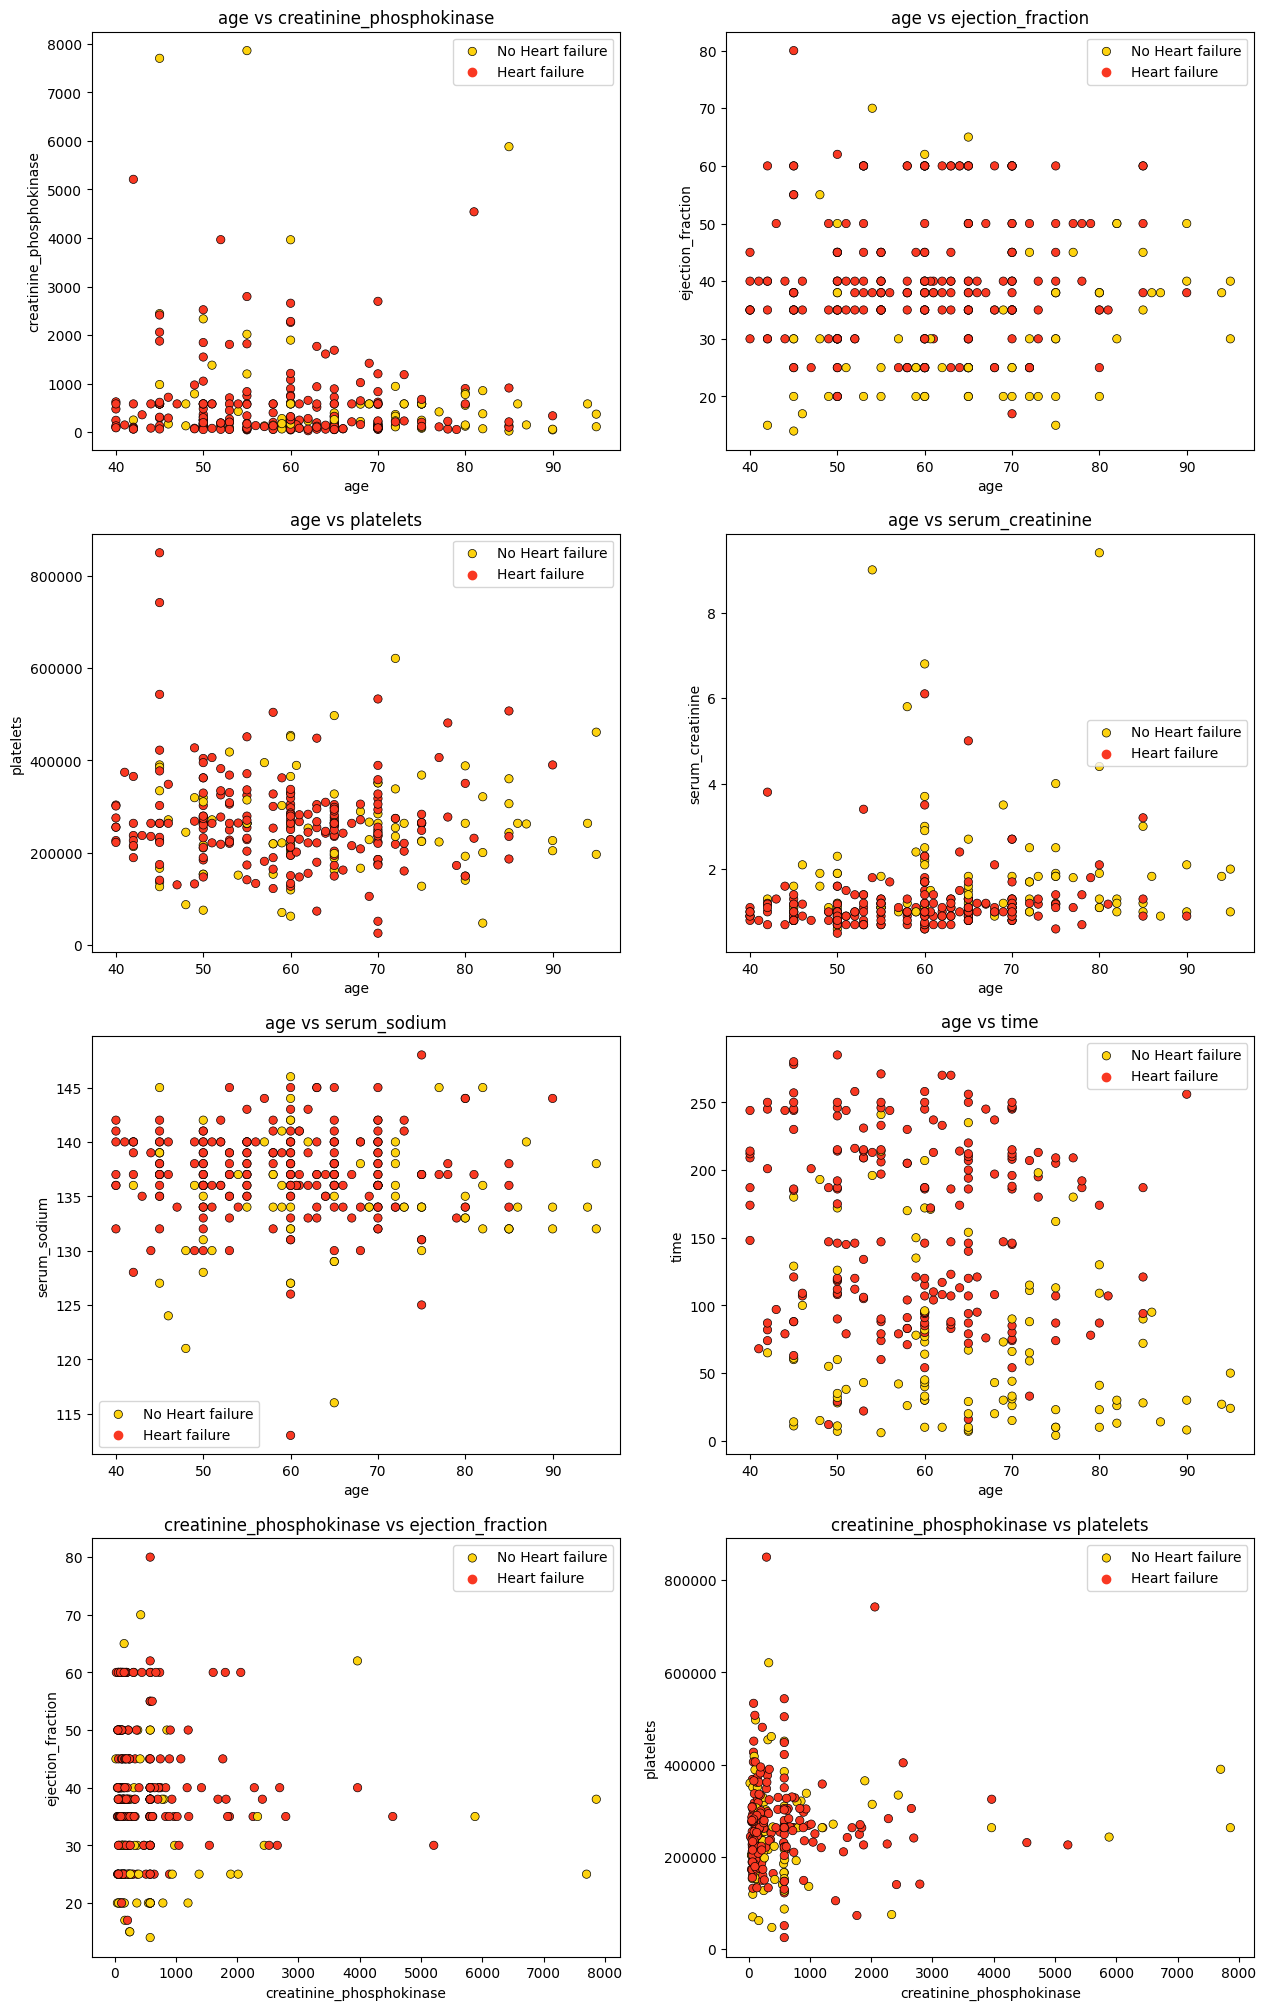

In [47]:
a = 0
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i and a < 8:
            a += 1
            plt.subplot(4, 2, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df,
                            hue='DEATH_EVENT', palette=colors, edgecolor='black')
            plt.legend(['No Heart failure', 'Heart failure'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)


In [48]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  age_Group  creatinine_phosphokinase_Group  \
0        0     4            1         15                               5   
1        0     6            1         11                              78   
2        1     7            1         13                               1   
3        0     7            1         10                               1   
4        0     8            1         13                               1   

   time_Group  
0           0  
1           0  
2           0  
3           0  
4           0

In [49]:
group_numerical_features

['age_Group', 'creatinine_phosphokinase_Group', 'time_Group']

In [50]:
df = df.drop(group_numerical_features, axis=1)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

##Data Scaling

In [51]:
from sklearn.preprocessing import RobustScaler
# apply feature scaling using the RobustScaler
scaler = RobustScaler()

In [52]:
df[numerical_features] 

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75.00                       582                 20  265000.00   
1   55.00                      7861                 38  263358.03   
2   65.00                       146                 20  162000.00   
3   50.00                       111                 20  210000.00   
4   65.00                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294 62.00                        61                 38  155000.00   
295 55.00                      1820                 38  270000.00   
296 45.00                      2060                 60  742000.00   
297 45.00                      2413                 38  140000.00   
298 50.00                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time  
0                1.90           130     4  
1                1.10           136     6  
2                1.30           129     7  
3                1.90           137     7  
4                2.70           116     8  
..                ...           ...   ...  
294              1.10           143   270  
295              1.20           139   271  
296              0.80           138   278  
297              1.40           140   280  
298              1.60           136   285  

[299 rows x 7 columns]

In [53]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    0.79                      0.71              -1.20       0.03   
1   -0.26                     16.35               0.00       0.01   
2    0.26                     -0.22              -1.20      -1.10   
3   -0.53                     -0.30              -1.20      -0.57   
4    0.26                     -0.19              -1.20       0.71   
..    ...                       ...                ...        ...   
294  0.11                     -0.41               0.00      -1.18   
295 -0.26                      3.37               0.00       0.09   
296 -0.79                      3.89               1.47       5.27   
297 -0.79                      4.65               0.00      -1.34   
298 -0.53                     -0.12               0.47       1.46   

     serum_creatinine  serum_sodium  time  
0                1.60         -1.17 -0.85  
1                0.00         -0.17 -0.84  
2                0.40         -1.33 -0.83  
3                1.60          0.00 -0.83  
4                3.20         -3.50 -0.82  
..                ...           ...   ...  
294              0.00          1.00  1.19  
295              0.20          0.33  1.20  
296             -0.60          0.17  1.25  
297              0.60          0.50  1.27  
298              1.00         -0.17  1.31  

[299 rows x 7 columns]

In [54]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.79        0                      0.71         0              -1.20   
1 -0.26        0                     16.35         0               0.00   
2  0.26        0                     -0.22         0              -1.20   
3 -0.53        1                     -0.30         0              -1.20   
4  0.26        1                     -0.19         1              -1.20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1       0.03              1.60         -1.17    1   
1                    0       0.01              0.00         -0.17    1   
2                    0      -1.10              0.40         -1.33    1   
3                    0      -0.57              1.60          0.00    1   
4                    0       0.71              3.20         -3.50    0   

   smoking  time  DEATH_EVENT  
0        0 -0.85            1  
1        0 -0.84            1  
2        1 -0.83            1  
3        0 -0.83            1  
4        0 -0.82            1

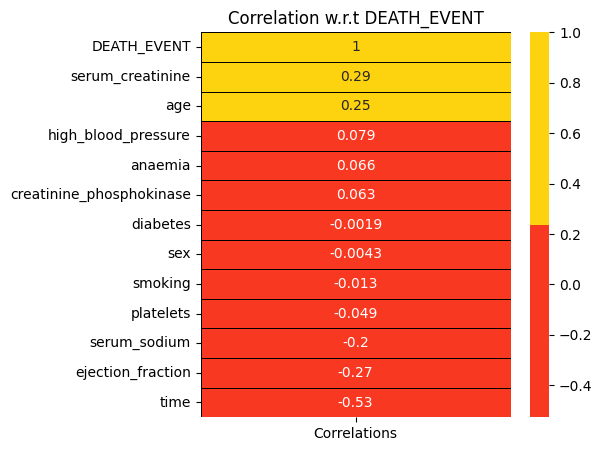

In [55]:
corr = df.corrwith(df['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t DEATH_EVENT');

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [58]:
df.loc[:,categorical_features[:-1]]

anaemia  diabetes  high_blood_pressure  sex  smoking
0          0         0                    1    1        0
1          0         0                    0    1        0
2          0         0                    0    1        1
3          1         0                    0    1        0
4          1         1                    0    0        0
..       ...       ...                  ...  ...      ...
294        0         1                    1    1        1
295        0         0                    0    0        0
296        0         1                    0    0        0
297        0         0                    0    1        1
298        0         0                    0    1        1

[299 rows x 5 columns]

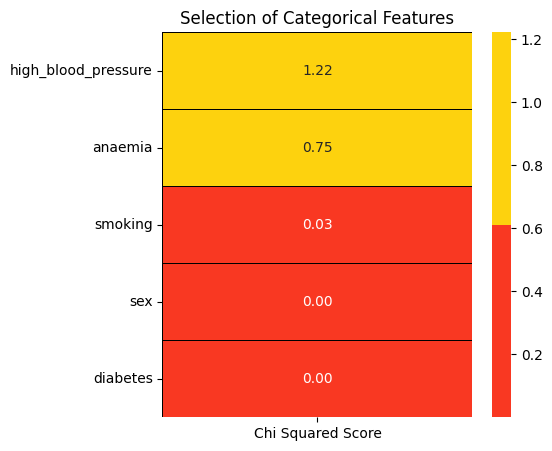

In [59]:
features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

According to the Chi squared score Smoking, sex, diabetes features are less important.

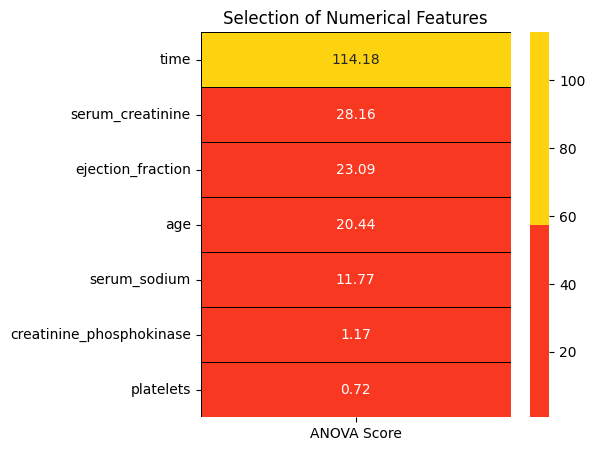

In [60]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Creatinine_phosphokinase, platelets are less important as compare to other paramenter. 

In [61]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.79        0                      0.71         0              -1.20   
1   -0.26        0                     16.35         0               0.00   
2    0.26        0                     -0.22         0              -1.20   
3   -0.53        1                     -0.30         0              -1.20   
4    0.26        1                     -0.19         1              -1.20   
..    ...      ...                       ...       ...                ...   
294  0.11        0                     -0.41         1               0.00   
295 -0.26        0                      3.37         0               0.00   
296 -0.79        0                      3.89         1               1.47   
297 -0.79        0                      4.65         0               0.00   
298 -0.53        0                     -0.12         0               0.47   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1       0.03              1.60         -1.17    1   
1                      0       0.01              0.00         -0.17    1   
2                      0      -1.10              0.40         -1.33    1   
3                      0      -0.57              1.60          0.00    1   
4                      0       0.71              3.20         -3.50    0   
..                   ...        ...               ...           ...  ...   
294                    1      -1.18              0.00          1.00    1   
295                    0       0.09              0.20          0.33    0   
296                    0       5.27             -0.60          0.17    0   
297                    0      -1.34              0.60          0.50    1   
298                    0       1.46              1.00         -0.17    1   

     smoking  time  DEATH_EVENT  
0          0 -0.85            1  
1          0 -0.84            1  
2          1 -0.83            1  
3          0 -0.83            1  
4          0 -0.82            1  
..       ...   ...          ...  
294        1  1.19            0  
295        0  1.20            0  
296        0  1.25            0  
297        1  1.27            0  
298        1  1.31            0  

[299 rows x 13 columns]

In [62]:
df.drop(columns = ['creatinine_phosphokinase','platelets','smoking','sex','diabetes'],inplace = True)
df.head()

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
0  0.79        0              -1.20                    1              1.60   
1 -0.26        0               0.00                    0              0.00   
2  0.26        0              -1.20                    0              0.40   
3 -0.53        1              -1.20                    0              1.60   
4  0.26        1              -1.20                    0              3.20   

   serum_sodium  time  DEATH_EVENT  
0         -1.17 -0.85            1  
1         -0.17 -0.84            1  
2         -1.33 -0.83            1  
3          0.00 -0.83            1  
4         -3.50 -0.82            1

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   ejection_fraction    299 non-null    float64
 3   high_blood_pressure  299 non-null    int64  
 4   serum_creatinine     299 non-null    float64
 5   serum_sodium         299 non-null    float64
 6   time                 299 non-null    float64
 7   DEATH_EVENT          299 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 18.8 KB


In [64]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split
features = df.iloc[:,:7]
target = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2, stratify=target)

In [121]:
features

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
0    0.79        0              -1.20                    1              1.60   
1   -0.26        0               0.00                    0              0.00   
2    0.26        0              -1.20                    0              0.40   
3   -0.53        1              -1.20                    0              1.60   
4    0.26        1              -1.20                    0              3.20   
..    ...      ...                ...                  ...               ...   
294  0.11        0               0.00                    1              0.00   
295 -0.26        0               0.00                    0              0.20   
296 -0.79        0               1.47                    0             -0.60   
297 -0.79        0               0.00                    0              0.60   
298 -0.53        0               0.47                    0              1.00   

     serum_sodium  time  
0           -1.17 -0.85  
1           -0.17 -0.84  
2           -1.33 -0.83  
3            0.00 -0.83  
4           -3.50 -0.82  
..            ...   ...  
294          1.00  1.19  
295          0.33  1.20  
296          0.17  1.25  
297          0.50  1.27  
298         -0.17  1.31  

[299 rows x 7 columns]

In [122]:
# !pip install --upgrade scikit-learn


In [123]:
# import sklearn
# print(sklearn.__version__)

In [124]:
# !pip install --upgrade scikit-learn


In [125]:
# !pip uninstall scikit-learn
# !pip install scikit-learn


In [271]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,precision_score,recall_score,auc,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [272]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
classifier_lr = LogisticRegression() 

Accuracy :  83.33%
Cross Validation Score :  87.84%
ROC_AUC Score :  76.51%


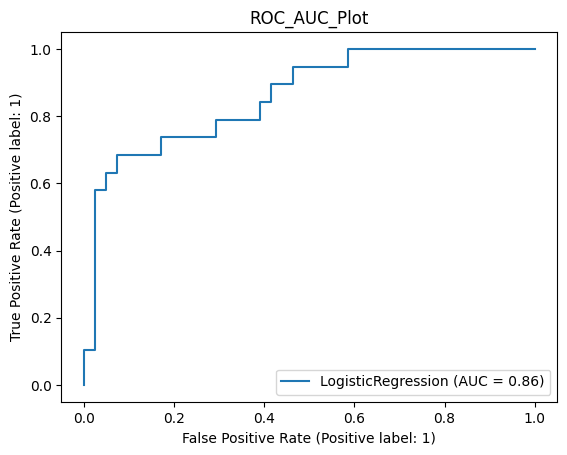

In [275]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



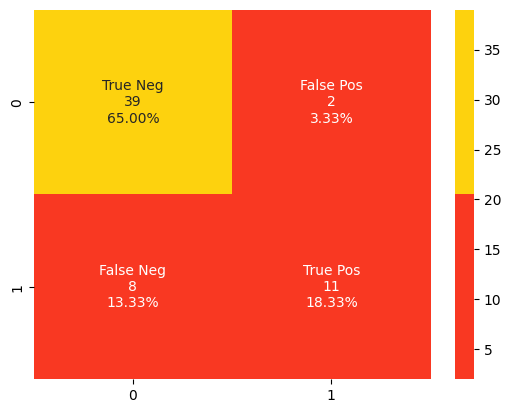

In [131]:
model_evaluation(classifier_lr)

In [132]:
from sklearn.tree import DecisionTreeClassifier 

In [133]:
classifier_dt = DecisionTreeClassifier()

Accuracy :  85.00%
Cross Validation Score :  72.42%
ROC_AUC Score :  79.14%


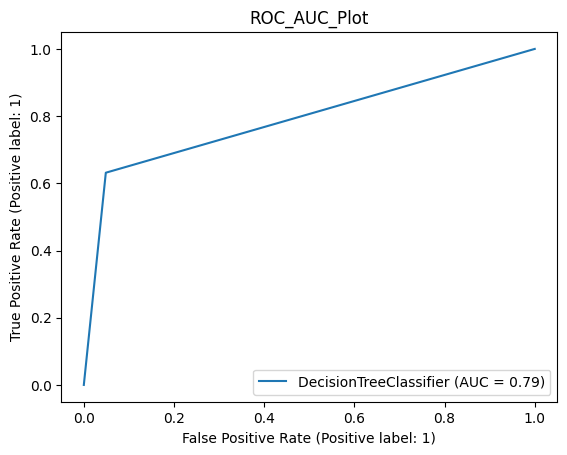

In [134]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



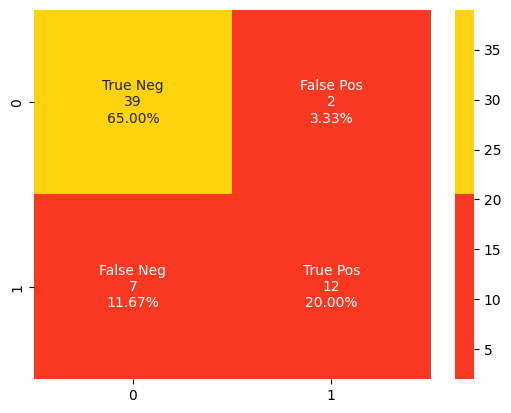

In [135]:
model_evaluation(classifier_dt)

In [136]:
from xgboost import XGBClassifier

#classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
classifier_xgb = XGBClassifier()

Accuracy :  85.00%
Cross Validation Score :  87.93%
ROC_AUC Score :  81.96%


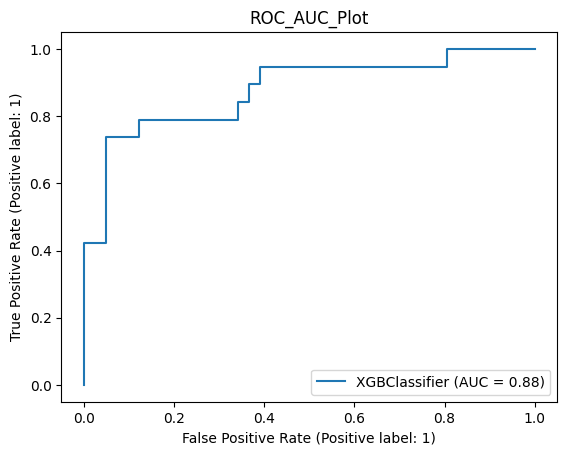

In [137]:
model(classifier_xgb)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



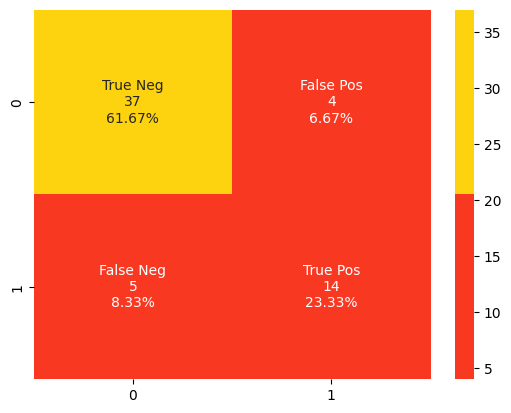

In [138]:
model_evaluation(classifier_xgb)

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
classifier_rf = RandomForestClassifier()

Accuracy :  85.00%
Cross Validation Score :  88.74%
ROC_AUC Score :  81.96%


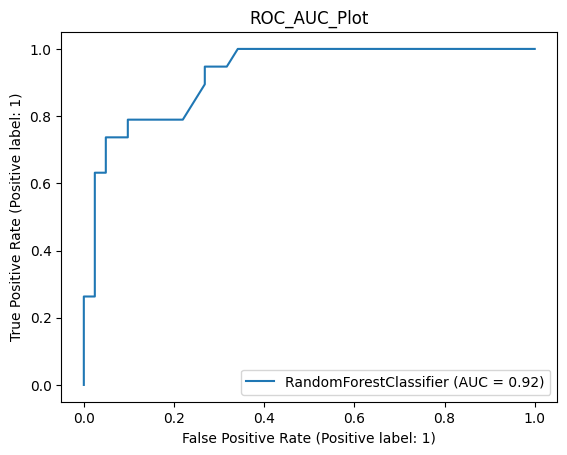

In [141]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



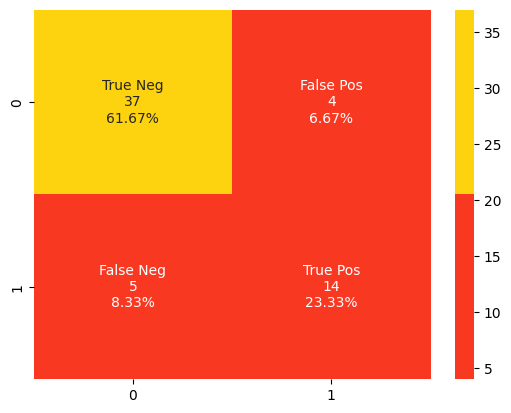

In [142]:
model_evaluation(classifier_rf)

In [276]:
# Application of all Machine Learning methods

MLA_dict = {'Logistic Regression ': LogisticRegression(),
               'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(), 
            'XGBoost ':XGBClassifier()
             }

In [277]:
def compare_models(MLA_dict,X_train,y_train):
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for algname, alg in MLA_dict.items():  
        predicted = alg.fit(X_train, y_train).predict(x_test)
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = algname
        MLA_compare.loc[row_index,'MLA used'] = MLA_name
        # MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(x_test, y_test), 4)
        MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'F1-Score'] = round(f1_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

        row_index+=1

    return MLA_compare

In [278]:
MLA_compare = compare_models(MLA_dict=MLA_dict,X_train=x_train,y_train=y_train)
MLA_compare

MLA used  Accuracy  Precission  Recall  F1-Score  AUC
0  Logistic Regression       0.83        0.85    0.58      0.69 0.77
1         Decision Tree      0.82        0.83    0.53      0.65 0.74
2         Random Forest      0.87        0.82    0.74      0.78 0.83
3              XGBoost       0.85        0.78    0.74      0.76 0.82

## Hyperparameter Tunning Using GridSearchCV

In [155]:
from sklearn.model_selection import GridSearchCV

In [279]:
# Define the hyperparameters for each model
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_params = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

In [280]:
def grid_search_func(classifier,param_dic):
  grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_dic
  )

  grid_search.fit(x_train, y_train)

  # Print the best hyperparameters and the corresponding mean test score
  print(f"Best hyperparameters for {classifier}: {grid_search.best_params_}")
  print(f"Best mean test score: {grid_search.best_score_}")

  


###Logistic Regression with Best parameter

In [159]:
grid_search_func(classifier_lr,log_reg_params)

Best hyperparameters for LogisticRegression(): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean test score: 0.8323581560283687


Accuracy :  86.67%
Cross Validation Score :  87.02%
ROC_AUC Score :  80.36%


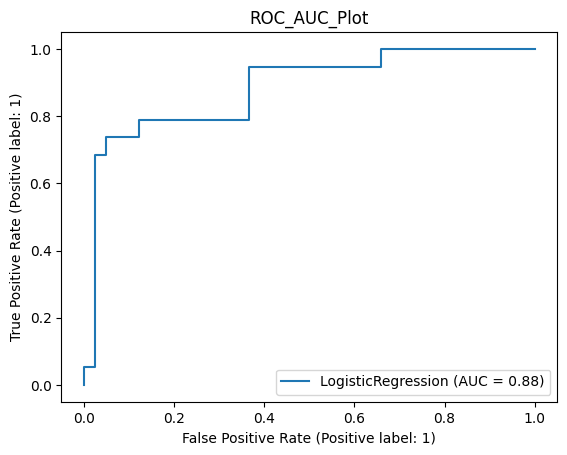

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



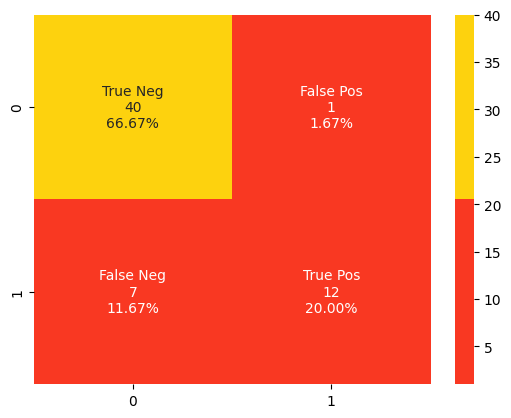

In [289]:
classifier_lr_BestParam = LogisticRegression(C=0.1, penalty = "l1",solver='liblinear')
model(classifier_lr_BestParam)
model_evaluation(classifier_lr_BestParam)

###Decision Tree with best parameter

In [161]:
grid_search_func(classifier_dt, dt_params)

Best hyperparameters for DecisionTreeClassifier(): {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best mean test score: 0.836968085106383


Accuracy :  83.33%
Cross Validation Score :  76.47%
ROC_AUC Score :  79.33%


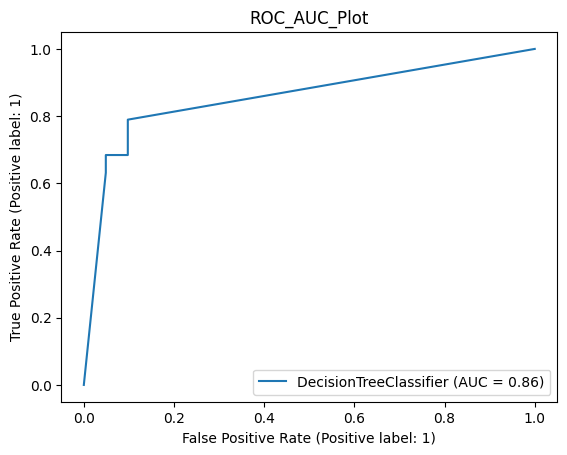

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



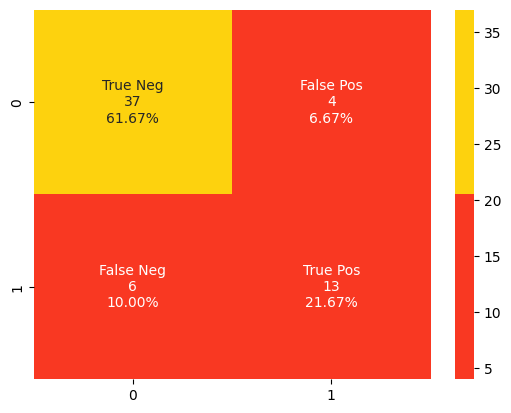

In [282]:
classifier_dt_BestParam = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5, splitter= 'best')
model(classifier_dt_BestParam)
model_evaluation(classifier_dt_BestParam)

###Random Forest with Best parameter

In [162]:
grid_search_func(classifier_rf, rf_params)

Best hyperparameters for RandomForestClassifier(): {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best mean test score: 0.8618794326241135


Accuracy :  88.33%
Cross Validation Score :  88.71%
ROC_AUC Score :  85.82%


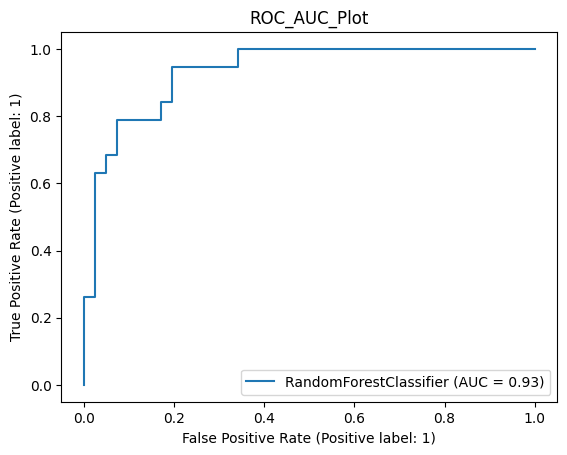

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60



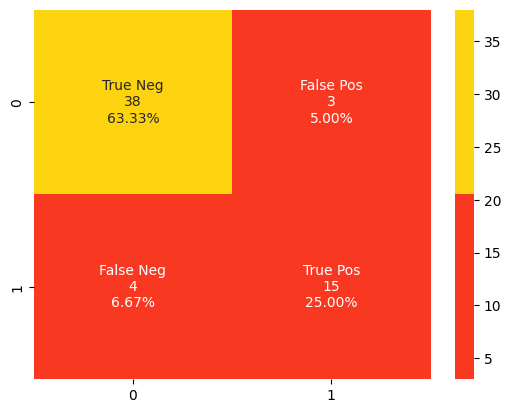

In [290]:
classifier_rf_BestParam = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
model(classifier_rf_BestParam)
model_evaluation(classifier_rf_BestParam)

###Xg boost with Best parameter

In [163]:
grid_search_func(classifier_xgb,xgb_params)

Best hyperparameters for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}
Best mean test score: 0.8578014184397162


Accuracy :  90.00%
Cross Validation Score :  89.36%
ROC_AUC Score :  87.03%


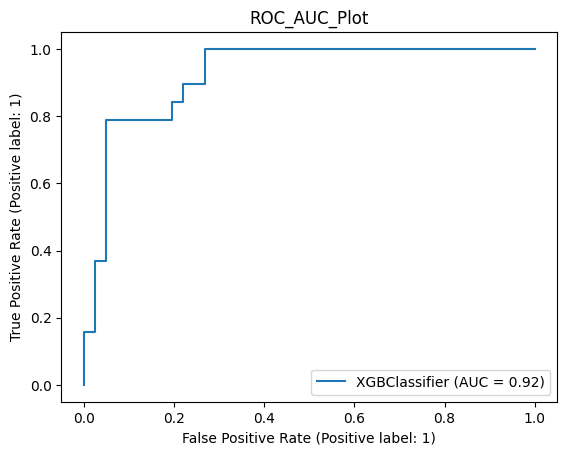

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.88      0.79      0.83        19

    accuracy                           0.90        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.90      0.90      0.90        60



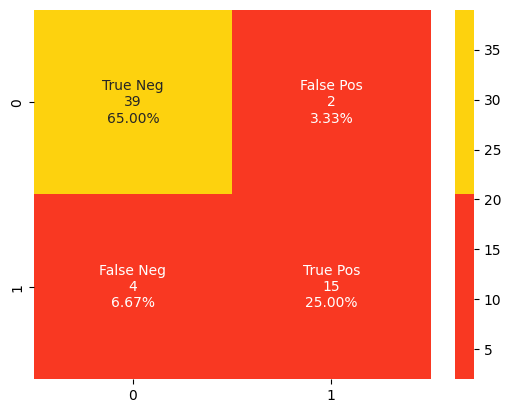

In [284]:
classifier_xgb_BestParam = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 7, n_estimators= 200, subsample= 0.7)
model(classifier_xgb_BestParam)
model_evaluation(classifier_xgb_BestParam)

In [287]:
# Application of all Machine Learning methods

MLA_dict_all = {'Logistic Regression ': LogisticRegression(),
               'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(), 
            'XGBoost ':XGBClassifier(),
            'Logistic Regression with Best parameter': LogisticRegression(C=0.1, penalty = "l1",solver='liblinear'),
            'Decision Tree with Best parameter ': DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5, splitter= 'best'),
            'Random Forest with Best parameter': RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50),
            'XGBoost with Best pararmeter': XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 7, n_estimators= 200, subsample= 0.7)
             }

In [288]:
MLA_compare_all = compare_models(MLA_dict=MLA_dict_all,X_train=x_train,y_train=y_train)
MLA_compare_all.sort_values(by = ['Accuracy','AUC'], ascending = False,inplace=True)
MLA_compare_all

MLA used  Accuracy  Precission  Recall  \
7             XGBoost with Best pararmeter      0.90        0.88    0.79   
6        Random Forest with Best parameter      0.88        0.88    0.74   
2                            Random Forest      0.87        0.87    0.68   
4  Logistic Regression with Best parameter      0.87        0.92    0.63   
3                                 XGBoost       0.85        0.78    0.74   
1                            Decision Tree      0.83        0.76    0.68   
0                     Logistic Regression       0.83        0.85    0.58   
5       Decision Tree with Best parameter       0.82        0.79    0.58   

   F1-Score  AUC  
7      0.83 0.87  
6      0.80 0.84  
2      0.76 0.82  
4      0.75 0.80  
3      0.76 0.82  
1      0.72 0.79  
0      0.69 0.77  
5      0.67 0.75

###Perform Machine Learning Interpretability/Explanability/

In [182]:
# !pip install eli5
# !pip install lime
# !pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=2381500bc6eae02c342050e8e8e630e1d5f8b09bb6e97001283f2a6d1445b587
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=a89ed3e6e6d857f3fefb98a2c340ac2bf14f7f76f9a865f03f3717e02ba06f04
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built 

###Eli5

In [184]:
import eli5
from eli5.sklearn import PermutationImportance


In [291]:
eli5.show_weights(classifier_lr_BestParam, feature_names=x_train.columns.tolist())

In [204]:
def eli5_func(classifier):
  classifier.fit(x_train, y_train)
  df11 = eli5.explain_weights_df(classifier, feature_names=x_train.columns.tolist())

    #df11 = df11.iloc[::-1]  # reverse order of rows

    # Define colors for positive and negative weights
  pos_color = 'white'
  neg_color = 'red' 

    # Format the data frame with custom colors for positive and negative values
  def highlight_pos(val):
      color = pos_color if val > 0 else 'black'
      return f'color: {color}'

  def highlight_neg(val):
      color = neg_color if val < 0 else 'black'
      return f'color: {color}'
  # print(f"Using Eli5 result for {classifier} is:")
  df_styled = df11.style.applymap(highlight_pos, subset=pd.IndexSlice[:, ['weight']]).applymap(highlight_neg, subset=pd.IndexSlice[:, ['weight']])
  return df_styled
  
   


In [292]:
eli5_func(classifier_lr_BestParam)

In [293]:
# Use eli5 to explain specific predictions by selecting a row in the test data with a negative label
negative_row = x_test[0:1]
eli5.show_prediction(classifier_lr_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [294]:
# Use eli5 to explain specific predictions by selecting a row in the test data with a negative label
postive_row = x_test[1:2]
eli5.show_prediction(classifier_lr_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [295]:
eli5_func(classifier_dt_BestParam)

In [232]:
x_test[0:1]

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
273 -0.95        0               0.13                    0             -0.80   

     serum_sodium  time  
273          0.50  1.00

In [239]:
x_test[1:2]

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
151 0.11        0               1.47                    1             -0.40   

     serum_sodium  time  
151          0.33  0.02

In [296]:
# Use eli5 to explain specific predictions by selecting a row in the test data with a negative label
negative_row = x_test[0:1]
eli5.show_prediction(classifier_dt_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [297]:
# Use eli5 to explain specific predictions by selecting a row in the test data with a negative label
postive_row = x_test[1:2]
eli5.show_prediction(classifier_dt_BestParam, negative_row,feature_names=x_test.columns.tolist())

####Lime

In [333]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import lime.lime_tabular


In [334]:
# Create a LIME explainer for the Random Forest model
rf_explainer = LimeTabularExplainer(
    x_train.values,
    feature_names=x_train.columns,
    class_names=['No Heart Failure', 'Heart Failure'],
    discretize_continuous=True
)

# Create a LIME explainer for the Random Forest model
xgb_explainer = LimeTabularExplainer(
    x_train.values,
    feature_names=x_train.columns,
    class_names=['No Heart Failure', 'Heart Failure'],
    discretize_continuous=True
)

In [335]:
# Explain a specific prediction for the Random Forest model
rf_exp = rf_explainer.explain_instance(
    x_test.iloc[0].values,
    classifier_rf_BestParam.predict_proba,
    num_features=5
)
# Access the coefficients, intercept, and R2 of the linear model for the Random Forest model
rf_exp.show_in_notebook(show_table=True)

In [336]:
# Explain a specific prediction for the XGBoost model
xgb_exp = xgb_explainer.explain_instance(
    x_test.iloc[0].values,
    classifier_xgb_BestParam.predict_proba,
    num_features=5
)
# Access the coefficients, intercept, and R2 of the linear model for the XGBoost model
xgb_exp.show_in_notebook(show_table=True)

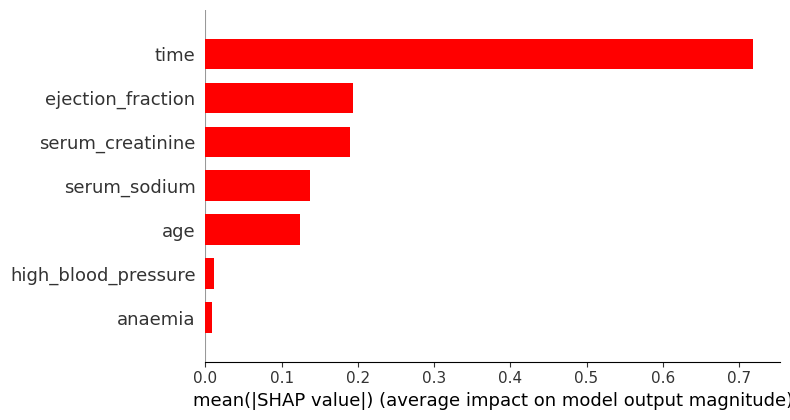

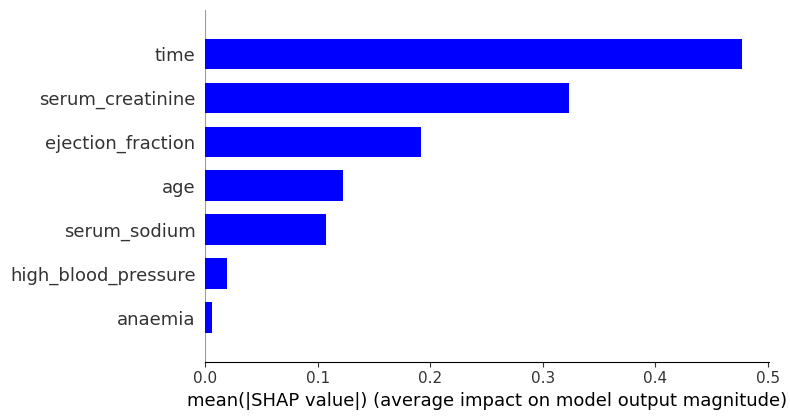

In [315]:
import shap

# Create a TreeExplainer object for the XGBoost model
xgb_explainer = shap.TreeExplainer(classifier_xgb_BestParam)

# Get shap_values for each class
shap_values = xgb_explainer.shap_values(x_test)

# Reshape shap_values
shap_values_neg = np.expand_dims(shap_values[0], axis=0)
shap_values_pos = np.expand_dims(shap_values[1], axis=0)

# Create feature importance plot for each class
shap.summary_plot(shap_values_neg, x_test, plot_type='bar', color='red')  # negative class
shap.summary_plot(shap_values_pos, x_test, plot_type='bar', color='blue')  # positive class

# Choose a random sample from the test set
sample = x_test.iloc[[20]]

# Interpret the XGBoost model for the chosen sample
base_value = xgb_explainer.expected_value  # use expected value as the base value
shape_values = shap.force_plot(base_value, shap_values[0], sample)  # visualize for negative class
shape_values = shap.force_plot(base_value, shap_values[1], sample)  # visualize for positive class
shap.initjs()

In [316]:
# Predict observations for each model
lr_pred = classifier_lr_BestParam.predict_proba(x_test)
dt_pred = classifier_dt_BestParam.predict_proba(x_test)
rf_pred = classifier_rf_BestParam.predict_proba(x_test)
xgb_pred = classifier_xgb_BestParam.predict_proba(x_test)

# Calculate accuracy for each model
lr_acc = classifier_lr_BestParam.score(x_test, y_test)
dt_acc = classifier_dt_BestParam.score(x_test, y_test)
rf_acc = classifier_rf_BestParam.score(x_test, y_test)
xgb_acc = classifier_xgb_BestParam.score(x_test, y_test)

# Print the results
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("Predictions (prob_T, prob_F):", lr_pred[0])

print("\nDecision Tree:")
print("Accuracy:", dt_acc)
print("Predictions (prob_T, prob_F):", dt_pred[0])

print("\nRandom Forest:")
print("Accuracy:", rf_acc)
print("Predictions (prob_T, prob_F):", rf_pred[0])

print("\nXGBoost:")
print("Accuracy:", xgb_acc)
print("Predictions (prob_T, prob_F):", xgb_pred[0])

Logistic Regression:
Accuracy: 0.8666666666666667
Predictions (prob_T, prob_F): [0.91108766 0.08891234]

Decision Tree:
Accuracy: 0.8166666666666667
Predictions (prob_T, prob_F): [1. 0.]

Random Forest:
Accuracy: 0.8833333333333333
Predictions (prob_T, prob_F): [0.98333333 0.01666667]

XGBoost:
Accuracy: 0.9
Predictions (prob_T, prob_F): [0.88940185 0.11059813]
